### 1. Введение

→ В прошлом модуле мы научились важному этапу в разработке модели — поиску оптимальных гиперпараметров. Этот этап важен для получения лучшего качества модели. 

В этом модуле мы поговорим о способах ансамблирования и сбора в пайплайн как о дальнейшем шаге развёртывания модели. Дальнейшим этапом в освоении профессии дата-сайентиста станет погружение в тематику задач и основных методов решения задач **metric learning**.

⬇️ Прежде чем приступить к освоению ансамблирования и пайплайнов, предлагаем пройти небольшой тест, чтобы освежить знания об архитектуре моделей машинного обучения.

### О ЧЁМ ЭТОТ МОДУЛЬ?

Вспомнив основные понятия при работе с данными, мы можем перейти к краткому ознакомлению с темами модуля. 

**АНСАМБЛИРОВАНИЕ МОДЕЛЕЙ**

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как случайный лес. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства.    

<img src="data\dspr-ml-8-2.png" alt="drawing" width="800"/>

Этот знакомый нам подход построения ансамбля называется бэггингом и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

**PIPELINE**

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, **кросс-валидации**). 

<img src="data\dst-3-ml-8-1.png" alt="drawing" width="700"/>

Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

Также  под пайплайном иногда подразумевают автоматизацию одного или нескольких этапов, названных ранее, например обработку данных. 

В этом модуле мы рассмотрим, для чего стоит использовать пайплайны, а также познакомимся с базовыми подходами по созданию пайплайнов на базе библиотеки scikit-learn.

**METRIC LEARNING**

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами metric learning (часто их обозначают как метрические алгоритмы). Основными задачами, решаемыми подходами metric learning, наряду с классическими задачами обучения с учителем, являются задача кластеризации и задача понижения размерности. Также metric learning иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

В этом модуле мы научимся применять на практике основные методы и подходы metric learning, в частности kNN, k-means.

**ЦЕЛИ МОДУЛЯ**

Целями модуля являются:

✔️ Научиться самостоятельно ансамблировать различными методами модели для повышения качества предсказаний.

✔️ Освоить практические методы создания пайплайнов и создать свой.

✔️ Применить подходы metric learning на практике.

_______________________________________

### 2. Ансамблирование: бэггинг, случайный лес

→ Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются **базовыми**.

Существует три основных способа построения ансамблей:

- Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
- Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
- Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

**Бэггинг** (bagging) — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам **случайный лес** (Random Forest). 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи **классификации** ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи **регрессии** же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging)

Давайте рассмотрим это на примере. 

Для задачи регрессии ансамблирование решения 10 случайных деревьев есть не что иное, как среднее значение предсказаний данных моделей. Пускай вектор ответов моделей равен out = [0.5, 0.6, 0.2, 0.4, 0.9, 1.0, -0.5, 0.3, 0.2, 0.0]. 

Посчитаем среднее значение: 

<img src="data\dst-3-ml-8-50.png" alt="drawing" width="600"/>

Итак, среднее значение вектора out равно 0.36, что и является предсказанием случайного леса.

<img src="data\dst-3-ml-8-3.png" alt="drawing" width="700"/>

✍️ Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева. 
Для этого возьмём датасет по решению задачи на прогрессирование диабета. Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression). Предлагается исполнить код:

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = load_diabetes(as_frame=True)
X = data['frame']
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<AxesSubplot:>

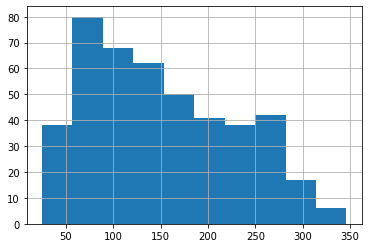

In [2]:
y.hist()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')
#Размерность обучающей выборки (296, 11)
#Размерность тестовой выборки (146, 11)
 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
regr1.fit(X_train, y_train)
##DecisionTreeRegressor(max_depth=10, random_state=42)
 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
##RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
 
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

#вывод: Качество предсказания по MSE для решающего дерева 4.09
#Качество предсказания по MSE для случайного леса  1.84

Размерность обучающей выборки (296, 11)
Размерность тестовой выборки (146, 11)
Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса  1.84


⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в  раз меньше, чем смещение отдельной базовой модели.

Выберем из нашей выборки $X$ бутстрапом $K$ раз выборку длиной $N$. Получим выборки $X_{1}, X_{2}, ..., X_{K}$. Обучим базовые модели $a(x)$ на данных подвыборках. Первую модель $a_{1}(x) = a(x,X_{1})$ обучим на первой выборке бутстрапа, вторую $a_{2}(x) = a(x,X_{2})$ — на второй и так далее. Выполнив данную процедуру  раз, мы получим предсказание как усреднение по всем обученным на подвыборках моделях.

<img src="data\dst-3-ml-8-58.png" alt="drawing" width="250"/>

Теперь рассмотрим изменение смещения (bias) и разброса (variance) ансамблирования по отношению к базовым моделям.

**Смещение** (bias) есть не что иное, как математическое ожидание разности между истинными ответами y и предсказаниями ансамбля: 

<img src="data\dst-3-ml-8-51.png" alt="drawing" width="600"/>
<img src="data\dst-3-ml-8-52.png" alt="drawing" width="500"/>


**Вывод**: смещение ансамбля равно смещению базовой модели ансамбля!

**Разброс** (variance, обозначим далее как ) — это дисперсия ответов алгоритма:

<img src="data\dst-3-ml-8-53.png" alt="drawing" width="700"/>
<img src="data\dst-3-ml-8-54.png" alt="drawing" width="600"/>
<img src="data\dst-3-ml-8-55.png" alt="drawing" width="600"/>

При условии некоррелированности базовых моделей, которая достигается за счёт обучения на бустрапе, последнее слагаемое равно нулю. Итого:

<img src="data\dst-3-ml-8-56.png" alt="drawing" width="700"/>

Тогда, зная, что модели не коррелированы, получаем:

<img src="data\dst-3-ml-8-57.png" alt="drawing" width="500"/>

**Вывод**: разброс ансамбля уменьшается в $K$ раз по сравнению с разбросом базовой модели!

Эта методика ансамблирования применима не только к одинаковым моделям (например к решающим деревьям), но и к любым другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

⭐️ В этом юните мы разобрали и научились применять на практике методы, лежащие в основе ансамблирования в случайном лесу. О более сложных методах поговорим в следующих юнитах.

**Задание 2.6**

Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. Предлагается используя код из модуля попытаться добиться неообучения для решающего дерева и случайного леса. Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [4]:
regr1 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr1.fit(X_train, y_train)
##DecisionTreeRegressor(max_depth=10, random_state=42)
 
regr2 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
##RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
 
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 397.47
Качество предсказания по MSE для случайного леса  303.12


**Задание 2.7**

Известно, что при большой глубине деревья склонны к переобучению. В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [5]:
regr1 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr1.fit(X_train, y_train)
##DecisionTreeRegressor(max_depth=10, random_state=42)
 
regr2 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
##RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
 
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса  1.84


____________________________________________

### 3. Ансамблирование: блендинг и стекинг

**Стекинг** (stacking) — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками**. 

**БЛЕНДИНГ**

Простейшая реализация стекинга заключается в **блендинге** (blending). 

Схематично блендинг можно представить следующим образом:

<img src="data\dst-3-ml-8-5.png" alt="drawing" width="800"/>

Суть блендинга состоит в следующем: предположим у нас есть обучающая выборка $X$, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – **метапризнаки,** на которых уже и обучается в дальнейшем метамодель. 

**Недостатки блендинга** видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных. 

**СТЕКИНГ**

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

Рассмотрим как обучается классический стекинг. Пусть у нас есть таблица с примерами X и ответами на них y. Количество признаков — m, количество наблюдений — n, количество моделей в стекинге — K.


1. Обучающая выборка разбивается на L равных частей, называемых **фолдами**. Например, для трёх фолдов (L=3) схематично это будет выглядеть следующим образом:

<img src="data\dst3-ml3-8_1.png" alt="drawing" width="800"/>

2. Затем для каждой базовой модели эти фолды перебираются следующим образом: на каждом шаге фиксируются L-1 фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу 1, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано L предсказаний, из которых формируется метапризнак $M_{j}$, где j — номер модели:

<img src="data\dst3-ml3-8_2.png" alt="drawing" width="800"/>

Такой подход к формированию метапризнаков позволяет избежать переобучения. Действительно, можно рассматривать L-1 -фолд как обучающую выборку, а оставшийся — как тестовую. Таким образом, мы обучаемся на тренировочной выборке, но предсказания делаем для той выборки, которую ещё не видели.

3. После того как мы проделаем шаг 2 для всех базовых моделей, мы получим новый набор данных, состоящий из  метапризнаков — предсказаний каждой из моделей. Предсказания моделей будут использоваться в качестве метапризнаков, на которых будет обучена метамодель.

Пусть мы взяли три разных модели, т. е. . Это будет выглядеть следующим образом:

<img src="data\dst3-ml3-8_3.png" alt="drawing" width="800"/>

**Примечание**. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Давайте посмотрим, как работает алгоритм на конкретной таблице. Пусть у нас есть некоторый набор данных из четырёх признаков, характеризующих клиента (x_0, x_1, x_2 и x_3), и восемь наблюдений. На основе этих признаков необходимо предсказать бинарный целевой признак (y) покупки товара со значениями 1 (купил) и 0 (не купил). Будем использовать стекинг, состоящий из трёх различных моделей.

Разбиваем выборку на четыре фолда, то есть в каждом фолде будет по две строки таблицы (обозначены цветом). Обучаем каждую модель на трёх из этих фолдов и делаем предсказание вероятности покупки для оставшегося.

Из предсказаний будет сформировано три метапризнака (по одному на каждую базовую модель). Это будут предсказанные базовыми классификаторами вероятности покупки (вероятность принадлежности к классу 1).

<img src="data\dst3-ml3-8_4.png" alt="drawing" width="800"/>

Формируем новый набор данных и отправляем его в метамодель, которая уже и делает финальное предсказание целевого признака покупки:

<img src="data\dst3-ml3-8_5.png" alt="drawing" width="600"/>

Метамодель будет производить поиск зависимостей в данных и принимать решение уже на основе предсказанных вероятностей покупки, которые были получены на первом этапе. 

В общем случае, когда у нас есть K моделей, общая схема стекинга будет иметь вид:

<img src="data\dst3-ml3-8_6.png" alt="drawing" width="700"/>

Важно понимать, стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Есть некоторые **рекомендации, как правильно строить стекинг**:

- В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
- В качестве базовых моделей лучшего всего использовать модели различной природы.
Из всех ансамблевых методов стекинг применяется реже всего. Главная причина: так как используется много разных моделей, необходимо подбирать их внешние параметры (коэффициенты регуляризации, глубина деревьев, число деревьев, темп обучения и т. д.) в совокупности, а подбор огромного количества параметров очень затратен по времени (мы убедились в этом в модуле по подбору внешних параметров моделей).

Вторая причина — в отличие от бэггинга и бустинга, для стекинга нет каких-то готовых решений, таких как случайный лес и градиентный бустинг над деревьями. Базовые модели нужно подбирать самому, а какие из них подойдут лучше всего — открытый вопрос.

Но, несмотря на эти недостатки, при грамотном подходе опытные специалисты выигрывают соревнования на Kaggle благодаря стекингу. Хотя зачастую таких участников называют «читерами» (от англ. cheat — «жульничать, обманывать»), ведь часто они собирают чуть ли не все возможные ML-модели в стекинг, запускают на мощном сервере подбор внешних параметров и комбинации из этих моделей в стекинге получают заветные 1.5 % прироста качества модели. На Kaggle даже существует фраза — «настекали».

В реальных условиях такой прирост значит мало, поэтому мы не будем концентрироваться на стекинге в нашем курсе, но пример разберём.

**СТЕКИНГ В SKLEARN**

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html, для задачи классификации — в классе StackingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

**Примечание**. Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки sklearn. В качестве входных данных будем использовать данные про диабет, использованные ранее. Обратимся снова к коду и обучим модель на данных.

Как и все ансамбли, модель стекинга находится в модуле ensemble.

In [6]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры StackingRegressor:

- estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
- final_estimator — метамодель.
- cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

 Будем строить стекинг на следующих моделях:

- 'dt' — дерево решений;
- 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
- случайный лес с количеством деревьев, равным 10, в качестве метамодели.

**Примечание**. В данном случае мы рассматриваем **RidgeCV**, которая представляет собой ридж-регрессию со встроенной кросс-валидацией по методу **Leave-One-Out Cross-Validation**. Подробнее читайте по ссылке https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html.

Создадим список кортежей в формате ("наименование модели", модель) из этих моделей, и назовем его estimators:

In [7]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики:

In [8]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [9]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')
#----------
 
#Вывод: Качество предсказания по MSE для стекинга 0.82

Качество предсказания по MSE для стекинга 0.81


Посмотреть на метапризнаки можно с помощью метода transform(). Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из двух моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [10]:
meta_data = reg.transform(X_train)
#Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,154.000000,154.0
1,192.000001,192.0
2,116.000002,116.0
3,81.000007,81.0
4,122.000005,122.0


↑ Наша таблица метапризнаков, на которой происходит обучение метамодели случайного леса. 

**Примечание**. При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

 ⬇️ Мы рассмотрели основные принципы работы стекинга и его реализацию в sklearn. Попробуйте применить стекинг для решения следующей задачи.

**Задание 3.5**

Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.

Постройте стекинг из следующих базовых моделей:

Ридж-регрессия (RidgeCV());
Линейная регрессия.
В качестве метамодели используйте случайный лес с количеством деревьев 100, максимальной глубиной 10, все параметры для базовых моделей стандартные. Для всех алгоритмов параметр random_state=42.

Сделайте предсказание целевой метки для тестового набора данных. Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до одного знака после запятой.

In [11]:
from sklearn import linear_model #линейные модели

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  linear_model.LinearRegression())
]


#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          max_depth=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)


y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')




Качество предсказания по MSE для стекинга 0.27


________________________________________

### 4. Ансамблирование: бустинг

→ Последней реализацией ансамблирования, которую мы рассмотрим, станет бустинг. Этот метод отличается от предыдущих своей структурой. 

**Бустинг (boosting)** — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

**Примечание**. Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля. 

Бустинг основан на вопросе, поднятом исследователями М. Кернсом и Л. Вэлиантом: «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые **веса наблюдений**. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

<img src="data\dst3-ml3-7_1.png" alt="drawing" width="900"/>

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Очень наглядно будет выглядеть модель бустинга для логистической регрессии при обучении на двух признаках:

<img src="data\dst3-ml3-7_2.png" alt="drawing" width="600"/>

На рисунке изображено расположение двух линейно неразделимых классов. Нельзя провести одну такую плоскость, которая идеально решает задачу классификации. Раз нельзя одну, давайте проведём две.

Возьмём точки, для которых первая логистическая регрессия совершила ошибку. Увеличим вес этих точек (их значимость). Далее построим такую разделяющую плоскость, которая в первую очередь обращает внимание на наблюдения, имеющие наибольший вес.

Наконец, объединим две модели в одну — получим модель-композицию, которая идеально решает задачу классификации!

**Примечание**. Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если бэггинг создавался с целью уменьшить разброс модели, то **цель бустинга** — уменьшить смещение модели.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают а**лгоритмы с высоким смещением и небольшим разбросом**, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

В этом юните мы постараемся затронуть основные шаги эволюции бустинга от первой успешной модели до современных модификаций. Начнём рассмотрение с самой первой модели бустинга — **адаптивного бустинга**.

### АДАПТИВНЫЙ БУСТИНГ 

Первая реализация бустинга называлась **AdaBoost**. Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

Так как алгоритм является несовершенным и в дальнейшем получил свое развитие, мы не будем подробно останавливаться на его работе. Однако приведем краткое описание работы алгоритма на примере задачи **бинарной классификации**. 

Пусть у нас есть набор данных X, в котором N объектов размерности m (вектора в признаковом пространстве размера M) и метки класса $y \in  {-1,1}$, где -1 и 1 — метки отрицательного и положительного класса соответственно.

Будем строить ансамбль из K абстрактных базовых моделей — классификаторов. Обозначим их как $a(x)$ (это могут быть логистические регрессии/деревья решений или что-то ещё).  

1. Перед обучением базовой модели мы инициализируем веса объектов обучающей выборки следующим образом: $w_j = \frac{1}{N}, \, j=1,2,\dots,N$
2. Для всех i от 1 до K:

    1. Обучить базовую модель $a_{i}(x)$ с учётом весов объектов $w_{j}$.

    2. Вычислить ошибку классификатора $a_{i}(x)$, обозначим её за $\epsilon_{i}$:

    <img src="data\dst-3-ml-8-59.png" alt="drawing" width="200"/>


**Примечание**. Здесь выражение $[y_{j} \neq a_{i}(x_{j})]$ — это знакомая нам по модулю классификации индикаторная функция. Она равна 1, если ответ $y_{j}$ не совпал с предсказанием базовой модели $a_{i}(x_{j})$, и 0 — в противном случае.

3. Тогда вес предсказаний данного классификатора (мера «вклада» предсказаний i-ой модели в общий ансамбль) вычисляется по формуле:   
$n_{i} = \frac{1}{2}ln (\frac{1 - e_{i}}{e_{i}})$  

Формула веса становится нулевой только при случайном угадывании, то есть когда классификатор ошибается в половине меток — работает ровно так же, как и подбрасывание монетки. Однако остальные будут вносить вес в итоговую модель с положительным или отрицательным знаком (в этом легко убедиться, подставив вероятность ошибки, отличную от 0.5). Тем самым мы исключаем возможность вклада случайных классификаторов в результирующую модель.

4. Обновляем веса объектов в выборке. Для тех объектов, на которых мы допустили ошибку, вес увеличивается; для тех объектов, для которых наш ансамбль предсказал верный ответ — не изменяется. Формула обновления весов:

<img src="data\dst-3-ml-8-60.png" alt="drawing" width="300"/>

Видно, что если классификация была произведена верно для объекта $x_{j}$, то степень экспоненты будет равна 0, а значит множитель $e^{-n_{j}[y_{j}\neq a_{i}(x_{j}]}=1$ и вес $w_{j}$ не изменится. 

Для того, чтобы привести все веса объектов к единому масштабу от 0 до 1, производится их нормировка путем деления каждого веса $w_{j}$ на сумму всех весов:

<img src="data\dst-3-ml-8-61.png" alt="drawing" width="200"/>

5. После обучения каждой базовой модели предсказания ансамбля строятся как сумма из предсказаний базовых моделей, взятых с весом $\eta_{i}$:$f(x) = sign (\sum_{i = 1}^{N} \eta_{i}a_{i}(x))$.


**Примечание**. Функция $sign$ — функция взятия знака, принимает значение -1, если аргумент функции отрицательный, 0 — если аргумент функции нулевой, и 1 — если аргумент функции положительный.  

$sign(x) = \left\{\begin{matrix} 1,x > 0 \\ 0, x = 0 \\ -1, x < 0 \end{matrix}\right.$

**В чём плюсы такого алгоритма**?

✔️ Он прост. Обратите внимание: все математические операции — школьный курс математики, о высшей математике даже не идёт речи. Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций.

✔️ Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей.

✔️ Показывает хорошую обобщающую способность.

✔️ Имеет возможность идентификации шумовых объектов.

**Но в чём минусы**?

⛔️ Жадное добавление алгоритмов приводит к неоптимальности композиции.

⛔️ Склонен к переобучению при наличии шума в данных.

⛔️ Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.

### АДАПТИВНЫЙ БУСТИНГ В SKLEARN

В sklearn адаптивный бустинг над решающими деревьями реализован в модуле sklearn.ensemble в виде классов AdaBoostRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html и AdaBoostClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier для задач регрессии и классификации соответственно. Давайте проведём обучение на тех же данных, что и в предыдущих моделях ансамблирования — на данных о диабете. 

Прежде чем перейти к практической части, предлагаем ознакомиться с параметрами AdaBoost:

- base_estimator — параметр отвечает за природу базовых моделей, по умолчанию это DecisionTreeRegressor c максимальной глубиной (max_depth) 3.
- n_estimators — максимальное количество базовых моделей, по умолчанию равно 50. В случае идеального обучения алгоритм завершается ранее, чем данное значение.
- learning_rate — темп обучения, параметр, добавляющий дополнительный множитель весу базовой модели, по умолчанию он равен 1.
- loss{'linear', 'square', 'exponential'} — функция ошибки для обновления весов (в теоретической части мы рассматривали экспоненциальную форму обновления весов — 'exponential')
- random_state — параметр, фиксирующий случайные процессы в модели.
Для сравнимости результатов со случайным лесом возьмём количество базовых моделей, равное 10. Как говорилось ранее, глубина деревьев должна быть меньше, чем у случайного леса. По умолчанию она равна 3.  

In [12]:
from sklearn.ensemble import AdaBoostRegressor
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=10
)

ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')
#----------

#Вывод: Качество предсказания по MSE для AdaBoost 40.5

Качество предсказания по MSE для AdaBoost 40.5


**Задание 4.1**

Измените количество базовых моделей до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Остальные параметры оставьте неизменными.

In [13]:
from sklearn.ensemble import AdaBoostRegressor
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=50
)

ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

Качество предсказания по MSE для AdaBoost 10.41


Основное отличие градиентного бустинга от адаптивного заключается в том, что градиентный бустинг строит композицию из своих базовых моделей, подбирая их оптимальным образом на основе принципа градиентных методов оптимизации. Такая модификация позволяет значительно ускорить процесс последовательного построения ансамбля в сравнении с реализации AdaBoost и добиться лучшего качества за счет меньшего количества моделей в ансамбле. 

### ГРАДИЕНТНЫЙ БУСТИНГ

**Градиентный бустинг (Gradient Boosting, GB)** — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием. Впервые алгоритм был опубликован профессором статистики Стэнфордского университета Джеромом Фридманом. Алгоритм оказался очень эффективным и в дальнейшем был множество раз модифицирован — до Extreme Gradient Boosting (XgBoost) и других модификаций, таких как CatBoost от Яндекса и LightGMB от Microsoft.

Сейчас градиентный бустинг и его модификации применяются практически везде. Любой запрос на Яндексе, выбор отеля на Booking или сериала на Netflix — всё это работает на градиентном бустинге. 

→ В этом модуле мы кратко рассмотрим принцип работы, а в модулях по математике разберём математическую формализацию алгоритма. 

В GB принцип классического бустинга сохраняется: каждый последующий алгоритм улучшает предыдущий, но, в отличие эвристического «взвешивания» наблюдений, градиентный бустинг использует информацию о функции потерь для построения нового алгоритма. 

Допустим, у нас есть некоторая функция потерь $L(y, \hat{y})$. Она зависит от двух аргументов: $y$ — истинный ответ, $\hat{y}=a(x)$ — прогноз модели $a(x)$. Причём неважно, какая это функция потерь (на самом деле ограничение есть — это дифференцируемость функции, то есть существование производной).

Для задачи регрессии это может быть, например, MSE:

$L(y, \hat{y})=-\frac{1}{n} \sum_{i}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$

Для задачи классификации это может быть, например, logloss:

$L(y, \hat{y})=-\sum_{i}^{n}\left(y_{i} \log \left(\hat{y}_{i}\right)+\left(1-y_{i}\right) \log \left(1-\hat{y}_{i}\right)\right)$

**Примечание**. Для logloss $\hat{y_{i}}$ в данном контексте означает не предсказанный класс для i-ого наблюдения, а вероятность принадлежности к классу 1 i-ого наблюдения, то есть на самом деле $y_{i}=P_{i}$. Чистая формальность для идентичности записей для регрессии и классификации.


Пусть мы построили какую-то модель, которая решает задачу классификации или регрессии. Обозначим её $a_{1}(x)$ — это какая-то функция, которая принимает на вход объекты $x$ и выдаёт для них предсказания. Качество такой модели, скорее всего, будет не очень хорошим, ведь мы обучаем слабые модели.

Однако мы знаем, на каких объектах модель давала точные предсказания, а на каких — ошибалась. Нужно попробовать использовать эту информацию и обучить ещё одну модель $a_{2}(x)$.

Допустим, мы знаем, что предсказание первой модели на каком-то объекте $x_{i}$ на 10 больше, чем в реальности. То есть $a_{1}(x_{i})=y_{i}+10$. То есть нам необходимо обучить следующую модель $a_{2}(x)$ таким образом, чтобы она предсказала для $x_{i}$ ответ -10, то есть $a_{2}(x_{i})=-10$. Тогда предсказание идеально совпадает с действительностью:  

$a_{1}(x_{i})+a_{2}(x_{i})=y_{i}+10-10=y_{i}$

→ Другими словами, следующая модель должна научиться предсказывать ошибки предыдущей.

В реальности вторая модель тоже не сможет обучиться идеально, поэтому обучим третью модель $a_{3}(x)$, которая будет «компенсировать» неточности первых двух. Будем продолжать так, пока не построим композицию из $K$ алгоритмов.

Финальная модель (обозначим её за $f(x)$), ищется в виде композиции из $K$ базовых алгоритмов определённого семейства (например, линейных моделей/деревьев):

$f(x)=\sum_{k=1}^{K} a_{k}(x)=a_{1}(x)+a_{2}(x)+\ldots+a_{K}(x)$

Этот подход можно интуитивно представить как игру в гольф. Цель гольфиста — закатить мяч в лунку (для нас это значит с абсолютной точностью предсказать $y$). Гольфист делает свой первый удар, получает новую координату мяча $\hat{y_{1}}$ (у нас это ответы алгоритма $a_{1}(x)$). Следующий удар гольфист производит из положения: $\hat{y_{1}}=f_{1}(x)=a_{1}(x)$ и снова промахивается. Для нас это значит построить следующий алгоритм $a_{2}(x)$, который учится предсказывать ошибки предыдущего. После второго удара композиция $$ — новое положение мяча будет равно:  
$f_{2}(x) = a_{1}(x) + a_{2}(x)$

Гольфист делает следующий удар $a_{3}(x)$ из положения: $\hat{y_{2}}=a_{1}(x)+a_{2}(x)$ . Новая координата мяча снова приближается к лунке и становится равной композиции:  
$f_{3}(x) = a_{1}(x) + a_{2}(x) + a_{3}(x)$

А затем следует ещё один удар, и ещё один… И так, пока гольфист не попадёт в заветную лунку. А мы продолжаем обучать всё новые и новые модели $a_{k}(x))$, пока не сделаем идеального предсказания, двигаясь в сторону минимума функции потерь.

Финальная композиция, состоящая из K ударов будет равна:   
$f(x)=\sum_{k=1}^{K}{a_k(x)}$

<img src="data\dst3-ml3-7_3.png" alt="drawing" width="800"/>

**Немного математического формализма **↓

Пусть на какой-то момент было обучено $k$ алгоритмов, где $k<K$. Итоговая композиция будет иметь вид:
$f_{k}(x) = a_{1}(x) + a_{2}(x) + ... + a_{k}(x)$

Тогда следующее слагаемое, модель $a_{k+1}(x)$ (обозначим её для краткости $b(x)$), должна строиться по принципу:
$L(y, f_{k}(x) + b(x)) \rightarrow min_{b}$

Знакомая запись, не правда ли? Она означает, что нам нужно найти такой алгоритм $b(x)=a_{k+1}(x)$, при котором наблюдается минимум функции потерь.

Чтобы построить эту модель $b(x)$, необходимо определить, что она будет пытаться предсказать.

Наша новая модель $b(x)$, по сути, должна предсказать вектор-столбец сдвигов (ошибок между истинными $Y$ и предсказаниями модели). Посмотрим на задачу под другим углом: нужно **предсказать такой вектор, который двигает предсказания в сторону уменьшения функции ошибки**.

Тут на сцену и выходит градиент, а точнее — антиградиент. Пусть мы пока не знаем математических тонкостей, но мы знаем, что этот вектор направлен в сторону убывания функции. Его и будем предсказывать моделью $b(x)$.

Допустим, мы каким-то образом рассчитаем этот антиградиент на обучающей выборке $-\nabla_{f_{k}}L$ (для всех популярных функций потерь уже выведены формулы его расчёта). Это будет просто вектор-столбец из каких-то чисел. Мы умеем предсказывать числа, то есть будем решать задачу регрессии: будем с помощью модели $b(x)$ предсказывать координаты этого вектора антиградиента. Например, можно построить такую модель $b(x)$, чтобы средний квадрат ошибки между её ответами и антиградиентом (MSE) был минимален.

Когда мы построим модель $b(x)$, мы добавим её ответы в композицию, но не все сразу, а умножим ответы на коэффициент $\eta$ — темп обучения. Этот коэффициент влияет на то, какой вклад каждая следующая модель будет оказывать на общую композицию. То есть:  
$f_{k+1}(x) = f_{k}(x) + \eta b(x),$

где $f_{k}(x)$ — ансамбль, построенный на $K$-ом этапе, $f_{k+1}(x)$ — новый ансамбль, который будет построен на следующем этапе $k+1$.

**Примечание**. Если принять, что предсказания $b(x)$ полностью совпадают с антиградиентом $b(x)=-\nabla_{a_{k}}L$, то получится формула градиентного спуска:  
$f_{k+1}(x) = f_{k}(x) - \eta \nabla_{f_{k}} L$

Но градиентный спуск происходит не в пространстве параметров, а в пространстве ответов ансамбля $f_{k}$. Что это за пространство и как в нём считать градиенты, мы обсудим, когда будем разбирать градиентный бустинг подробнее.

Сейчас же для нас важно понимать, что каждая новая модель бустинга будет строиться так, чтобы двигать всю композицию вниз по функции потерь — в сторону вектора антиградиента.

**Зачем нужен параметр $\eta$**?

Он позволяет избежать переобучения и плавно приближаться к минимуму функции потерь.

Например, модель для какого-то $i$-ого наблюдения $b(x_{i})$ предсказала, что ошибка (градиент) будет равна -5. Мы могли бы прибавить к полученным ранее ответам модели $f_{k}(x)$ эту 5:  
$f_{k}(x_{i}) + b(x_{i}) = f_{k}(x_{i}) - 5$

Но так мы сразу сведём эту ошибку к 0 и подстроимся под обучающую выборку. Поэтому мы прибавляем не 5, а умножаем 5 на небольшое число $\eta$, например на 0.1:  
$f_{k}(x_{i}) + \eta b(x_{i}) = f_{k}(x_{i}) - 0.5$

Тогда мы будем плавно уменьшать ошибку с каждой новой моделью.

Если базовая модель — это дерево решений, то схематично это будет выглядеть следующим образом:

<img src="data\dst3-ml3-7_4.png" alt="drawing" width="500"/>

В качестве базовой модели можно использовать всё что угодно, но общепринятым является использование деревьев решений. Практика показывает, что это наилучший выбор, так как деревья решений очень просты в построении и из всех слабых моделей обладают наилучшей способностью описывать сложные зависимости.

Бустинг, использующий в качестве базовой модели дерево решений, называется **градиентным бустингом над деревьями решений (Gradient Boosting on Decision Trees, GBDT)**. 

Схематично работу алгоритма GBDT можно представить следующим образом:

<img src="data\dst3-ml3-7_5.png" alt="drawing" width="900"/>

Основным преимуществом такой схемы градиентного бустинга является эффективность в поиске нелинейных зависимостей в сравнении с любыми моделями, основанными на решающих деревьях. Это преимущество стало причиной доминирования GBDT на огромном спектре соревнований — от кредитного скоринга до рекомендательных систем.

В заключение введения в градиентный бустинг приведём некоторые рекомендации по выбору внешних параметров алгоритма:

- **Количество деревьев (n_estimators)**. Чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (50-100), а затем следить за ошибкой на тестовой выборке.
- **Темп обучения  (learning_rate)**. Чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от 0.01 до 1.
- **Максимальная глубина деревьев (max_depth)**. Градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной от 1 до 8.

→ Все параметры влияют на обучение комплексно, поэтому их следует подбирать одновременно. О том, какие инструменты для этого существуют, мы поговорим в отдельном модуле.

Чтобы понять, как на градиентный бустинг влияют параметры темпа обучения, максимальной глубины деревьев и количества деревьев, предлагаем вам поиграть с настройками градиентного бустинга интерактивной демонстрации Brilliantly wrong.

Вы можете регулировать следующие параметры:

- tree depth — максимальная глубина деревьев;
- learning rate — темп обучения;
- subsample — процент выборки, отведённый на обучение;
- trees — количество деревьев.

На демонстрации вы сможете увидеть, как меняется функция ошибки на тренировочной (train loss) и тестовой (test loss) выборках при изменении параметров, а также как меняется вид разделяющей поверхности.

Пример:

<img src="data\dst3-ml3-7_6.png" alt="drawing" width="900"/>

### ГРАДИЕНТНЫЙ БУСТИНГ В SKLEARN

Как и все ансамбли, градиентный бустинг находится в модуле ensemble библиотеки sklearn. В качестве входных данных продолжим использовать данные о диабете.

 Градиентный бустинг над деревьями для решения задачи регрессии реализован в классе GradientBoostingRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html. Для задачи классификации данный метод реализован в классе GradientBoostingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. Параметры у классов схожи, различия только в функции потерь. Поэтому мы можем рассмотреть параметры GradientBoostingRegressor, подразумевая, что у классификатора они идентичны.

Основные параметры **GradientBoostingRegressor**:

loss — функция потерь. По умолчанию в регрессии 'squared_loss' - наша любимая MSE, а в классификации 'deviance' - логистическая функция потерь (logloss).

- learning_rate — темп обучения. По умолчанию 0.1. 
- n_estimators — количество деревьев в бустинга (число  из бустинга). По умолчанию равно 100.
- max_depth — максимальная глубина одного дерева. По умолчанию равна 3 — строятся короткие деревья с большим смещением.
- min_samples_leaf — минимальное число объектов в листе. По умолчанию 1.
- random_state — число, отвечающее за генерацию случайных чисел.

✍️ Давайте построим модель градиентного бустинга над деревьями решений. Продолжим использовать данные о диабете:

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(
	max_depth=3, #максимальная глубина дерева
n_estimators=50, #количество деревьев
random_state=42 #генератор случайных чисел
)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, gb_pred),2)}')
# ----------
 
# Вывод: Качество предсказания по MSE для GradientBoosting 0.91

Качество предсказания по MSE для AdaBoost 0.91


Как мы видим, при прочих равных градиентный бустинг даёт меньшую метрику по сравнению с адаптивным. Напомним, что из тестового задания по AdaBoost на 50 базовых моделях метрика MSE для адаптивного бустинга была равна 26.37. 

⬇️ Однако не стоит радоваться, так как в зависимости от качества данных, от различных параметров, например количества базовых моделей, картина может измениться в обратную сторону. Пример таких параметров представлен в задании ниже. 

**Задание 4.5**

Измените количество базовых моделей до 10 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.

In [15]:
gb = GradientBoostingRegressor(
	max_depth=3, #максимальная глубина дерева
n_estimators=10, #количество деревьев
random_state=42 #генератор случайных чисел
)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для AdaBoost 702.75


In [16]:
gb = GradientBoostingRegressor(
	max_depth=3, #максимальная глубина дерева
n_estimators=100, #количество деревьев
random_state=42 #генератор случайных чисел
)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для AdaBoost 0.77


Полученное качество говорит о том, что с повышением количества базовых моделей наша модель сходится к решению быстрее прочих моделей. Однако высокая ошибка на маленьком количестве моделей говорит о том, что использования малого количества моделей может не хватить, чтобы модель действительно качественно обучалась, то есть повышение качества у градиентного бустинга происходит нелинейно.

✍️ Попробуем решить задачу бинарной классификации с помощью градиентного бустинга. Для этого возьмём датасет качества вина. В качестве целевой метки будем считать качественным вино, рейтинг которого больше пяти.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

Загрузим данные: 

In [18]:
df =pd.read_csv('data/winequality-red.csv', sep = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как и договаривались ранее, хорошим вином будем считать все, имеющие значение признака quality больше 5:

In [19]:
X = df.drop(['quality'],axis = 1)
y = (df['quality'] >5).astype(int)

Разделим выборку на обучающую и тестовую:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
 
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')
# ----------
# Размерность обучающей выборки (1071, 11)
# Размерность тестовой выборки (528, 11)

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)


Инициализируем модель градиентного бустинга:

In [21]:
gb = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

Обучим её на тренировочной выборке:

In [22]:
gb.fit(X_train, y_train)

c:\Users\Work\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(loss='deviance', random_state=42)

Посмотрим на метрики классификации с помощью classification_report():

In [23]:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



Аналогично другим классификаторам в sklearn мы можем получать оценки вероятностей для каждого класса с помощью метода predict_proba(). Можете использовать эту возможность, например, для подбора оптимального порога вероятности, как мы делали это в предыдущих модулях.

In [24]:
gb.predict_proba(X_test)

array([[0.7575177 , 0.2424823 ],
       [0.81931477, 0.18068523],
       [0.80325657, 0.19674343],
       ...,
       [0.0212709 , 0.9787291 ],
       [0.90355559, 0.09644441],
       [0.80946194, 0.19053806]])

Известно, что с уменьшением темпа обучения (learning_rate) возникает необходимость повышения количества базовых моделей, то есть существует некоторая дилемма (trade-off) между темпом обучения и количеством моделей (n_estimators). Посмотрим на практике, как эти параметры связаны между собой.

**Задание 4.6**

Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [25]:
gb1 = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
 
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Work\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.74      0.71       238
           1       0.77      0.73      0.75       290

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528



**Задание 4.7**

Увеличьте количество деревьев до 500, остальные параметры оставьте прежними.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

accuracy на тестовой выборке:

In [26]:
gb1 = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
 
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Work\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.75      0.73       238
           1       0.79      0.76      0.77       290

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.76      0.75      0.75       528



**Задание 4.8**

Увеличьте learning rate до 0.2.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [27]:
gb1 = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.2, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел
)
 
gb1.fit(X_train, y_train)
y_pred = gb1.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Work\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.76      0.77       238
           1       0.81      0.83      0.82       290

    accuracy                           0.80       528
   macro avg       0.80      0.80      0.80       528
weighted avg       0.80      0.80      0.80       528



⭐️ Поздравляем! Мы разобрали практически все ныне существующие методы ансамблирования — от самых простых, которые легли в основу случайного леса, до самых передовых (градиентных бустингов). Мы посмотрели на реализации в библиотеке sklearn, постарались разобрать методологию и основные параметры каждой модели. 

Основными рекомендациями по использованию ансамблей является использование случайных лесов и градиентных бустингов в первую очередь для классических задач классификации и регрессии с простыми табличными данными, так как подавляющее большинство соревнований в этой области было выиграно именно благодаря этим двум моделям. 

После данного модуля может сложиться впечатление, что ансамблирование — всегда лучший вариант для финальной модели, однако часто в задачах требуется **интерпретируемость** результатов, которой не могу похвастаться бустинг и стекинг. 

Кроме того, использование случайного леса на данных с большим количеством выбросов может привести к тому, что модель будет обучается на данных, у которых дисперсия в разы больше, чем у исходных, так как подвыборка для обучения выбирается случайно. Таким образом, мы не сможем получить выигрыш в дисперсии, который нам даёт ансамблирование. 

В заключение приведём таблицу преимуществ и недостатков методов ансамблирования:

<img src="data\pic-1.png" alt="drawing" width="1100"/>

______________________________________________

### 5. Пайплайны

→ Поговорим о пайплайнах: чем они хороши, для чего применяются и как на практике реализовать свой пайплайн. 

Как говорилось ранее, **пайплайн** — это автоматизированный поэтапный процесс выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества. 

Основные цели использования пайплайнов — автоматизация, ускорение вычислений с использованием многопоточности в Python и дальнейшее развертывание пайплайна для использования в периодических расчетах (сбор данных в режиме онлайн/онлайн-работа модели). Кроме того, пайплайны хороши в случае, когда надо подобрать оптимальные гиперпараметры для всего цикла обработки данных и последующего обучения. 

В библиотеке scikit-learn пайплайны реализованы как класс **sklearn.pipeline.Pipeline()**. Этот класс может быть использован для сбора воедино отбора и обработки данных вместе с итоговой моделью. 

Важной особенностью применения пайплайна в реализации scikit-learn является обязательное наличие у каждого метода внутренних преобразований **transform()**, а для финальной модели — метод **fit()**. 

Давайте рассмотрим создание пайплайна на конкретном примере: 

Возьмём для примера датасет недвижимости в Калифорнии, в котором решается задача регрессии (определение цены недвижимости).

**California Housing Dataset**

- MedInc — медианный уровень дохода в квартале;
- HouseAge — медианный возраст дома в квартале;
- AveRooms — среднее количество помещений;
- AveBedrms — среднее количество спальных комнат;
- Population — население квартала;
- AveOccup — средний срок проживания;
- Latitude — значение широты квартала;
- Longitude — значение долготы квартала;
- Price — целевое значение.

Загрузим датасет и посмотрим на него:

In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
 
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.loc[:,'target'] = data['target']
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Определимся с метрикой, по которой будем оценивать качество модели — **Root Mean Squared Error (RMSE)**, корень из среднего квадрата отклонения. Для этого на метод mean_squared_error подадим атрибут squared = False, который позволяет управлять возведением метрики в квадрат. Помимо RMSE для оценки качества модели будем использовать метрику **R2**.

In [29]:
def rmse(y_hat, y):
    return mean_squared_error(y_hat, y, squared = False)

Посмотрим на типы данных с помощью метода df.info().

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Видим, что данные исключительно типа float, поэтому мы можем в качестве предобработки применить к ним **StandardScaler()**.

Разделим данные на обучающую и тестовую выборки, используя **train_test_split**: 

In [31]:
X = df.drop('target', axis=1)
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
print(f'Размер обучающей выборки {X_train.shape}')
print(f'Размер тестовой выборки {X_test.shape}')
# ----------
# Размер обучающей выборки (15480, 8)
# Размер тестовой выборки (5160, 8)

Размер обучающей выборки (15480, 8)
Размер тестовой выборки (5160, 8)


Обучим простейший пайплайн, вызвав метод **fit()**, состоящий из случайного леса и стандартизации (**StandardScaler**). На вход пайплайна подается список из преобразований в формате кортежа (название метода преобразования, по которому мы будем обращаться в дальнейшем к нашему преобразованию, объект  метода преобразования). Например:

In [32]:
pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipeline.fit(X_train, y_train)
# --------- 
Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

Посмотрим на метрики. Для этого сделаем предсказание пайплайном с помощью метода **predict()** и посчитаем R2 и RMSE с помощью функций **r2_score()** и **rmse()** соответственно. Округлим результат до четырёх цифр после запятой.

In [33]:
y_pred = pipeline.predict(X_test)
print(f'Качество по метрике R2: { round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
# ----------
# Качество по метрике R2: 0.808
# Качество по RSME: 0.5041

Качество по метрике R2: 0.8093
Качество по RSME: 0.5024


Теперь мы можем посмотреть на все параметры в пайплайне, вызвав метод get_params():

In [34]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 1.0,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

**Примечание.** В качестве альтернативного метода задания пайплайна можно использовать метод make_pipeline, на вход которого подаются объекты, которые будут использованы в пайплайне. В нашем случае:

    sklearn.pipeline import make_pipeline
    make_pipeline(StandardScaler(), RandomForestRegressor())

Использование пайплайна в виде, полученном из make_pipeline, аналогично. 

Попробуем теперь обратиться к отдельной части пайплайна. Попробуем вызвать значение n_estimator у случайного леса. Мы можем это сделать двумя способами: индексацией пайплайна или обращением через имя, которые мы задали ранее при создании ('rf').

In [35]:
print(pipeline[1].n_estimators)
print(pipeline['rf'].n_estimators)
# ----------
# 100
# 100

100
100


Теперь попробуем задать этому же параметру значение 200. Можно это сделать, используя метод set_params(), на вход которого надо подавать конструкцию **<название модуля>__<название параметра>**. 

Обратите внимание на **два нижних подчеркивания**, которые используются в качестве литералов для разбиения названия модуля и названия его параметра. Без него компилятор будет неправильно интерпретировать параметр, который вы хотите изменить!

In [36]:
pipeline.set_params(rf__n_estimators=200)
Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor(n_estimators=200))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=200))])

Данную структуру надо учитывать, когда для пайплайна задается GridSearch кросс-валидация. Попробуем взять 100, 200, 500 базовых моделей и сделать поиск оптимального параметра StardardScaler with_mean (типа bool, который отвечает за центровку данных, приводит распределение к нулевому среднему, по умолчанию — True. В противном случае среднее данных остается неизменным):

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'scaler__with_mean':[True,False],
              'rf__n_estimators':[100, 200, 500]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose = True)


grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=500))])


In [38]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Качество по метрике R2: { round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
# ----------
 
# Качество по метрике R2: 0.81
# Качество по RSME: 0.5013

Качество по метрике R2: 0.8094
Качество по RSME: 0.5021


Как видим, качество улучшилось по обеим метрикам.

При использовании пайплайна для сборки обработки данных в один стек удобно воспользоваться **Column Tranformer**. Мы разберём его устройство на примере датасета рейтинга красного вина. 

Для начала загрузим данные и посмотрим на них:

In [39]:
df_wine= pd.read_csv('data/Red.csv')
df_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [40]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


Например, у нас есть численный признак цена вина (Price) и категориальный регион производства (Region). Для первого надо применить **StandardScaler()**, для второго — **OneHotEncoder()**. Мы можем сделать это следующим образом:

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
     (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']))
print(ct)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['Price']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Country'])])


**Примечание**. Если мы хотим применить, например, OneHotEncoder, к более чем одному признаку, то просто достаточно добавить в список колонки, например ['Country', ‘Region’]. Теперь OneHotEncoder будет работать не только на признаке Country, но ещё и на Region.

Примечание. Можно также использовать фильтрацию по типу колонок, используя метод make_column_selector() из sklearn.compose:

       ct = ColumnTransformer([
              ('scale', StandardScaler(),
              make_column_selector(dtype_include=np.number)),
              ('onehot',
              OneHotEncoder(),
              make_column_selector(dtype_include=object))])

Полученный трансформер можно использовать в качестве элемента пайплайна, например: 

In [42]:
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor())])

Давайте посмотрим на результат работы ColumnTransformer в пайплайне. Для этого обучим его на колонках Price и Country, а в качестве целевой метки используем рейтинг вина Rating.

In [43]:
X = df_wine[['Country', 'Price']]
y = df_wine['Rating']
pipeline.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])

<img src="data\dst-3-ml-8-28.png" alt="drawing" width="400"/>

Теперь вызовем отдельно ct и преобразуем X. 

Важный момент: при отображении после преобразования ваш датасет будет представлен в виде **sparse-матрицы** (специальный формат для хранения больших, практически полностью нулевых матриц), поэтому надо будет вызвать метод **toarray()**. Так же мы можем получить названия колонок с onehotencoder с помощью метода **.get_feature_names_out()**, обратившись именно к энкодеру. 

In [44]:
pd.DataFrame(pipeline['ct'].transform(X).toarray(), columns = ['Price']+ pipeline['ct'].transformers_[1][1].get_feature_names_out().tolist())

,Price,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_China,Country_Croatia,...,Country_Portugal,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United States,Country_Uruguay
0,0.657648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.278402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.373184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.358231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117684,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,-0.266981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8662,-0.224358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8663,-0.178910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8664,-0.387784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


⭐️ Итак, мы научились использовать и собирать полноценный пайплайн, узнали о трансформациях колонок, которые позволяют легко и просто делать рутинные задачи типа нормализации/стандартизации и кодирования категориальных признаков. 

Обученный пайплайн можно сохранить в формат pickle https://docs.python.org/3/library/pickle.html, например, используя библиотеку joblib. Далее его можно использовать после десериализации как решение «из коробки», применяя следующие методы.

**Примечание**. Формат pickle реализует двоичный протокол для сериализации/десериализации объектов для сохранения и последующего использования без каких-либо дополнительных преобразований. Удобен для переноса обученных моделей, предобработки и так далее.

**Сериализация** — процесс перевода структуры данных в последовательность битов. 

**Десериализация** — процесс создания из последовательности битов  структуры данных.

In [45]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import joblib
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

После этого ваш пайплайн будет сохранен в файл pipeline.pkl. Вы можете использовать свой пайплайн, импортировав все библиотеки из зависимостей (которые импортировались при создании пайплайна), используя следующие строчки кода:

In [47]:
pipeline_loaded = joblib.load('pipeline.pkl')
print(pipeline_loaded)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])


Как видим, пайплайн успешно сохранился.

Таким образом, мы можем использовать уже готовый пайплайн, например для проведения онлайн расчётов и постановки модели на постоянный регулярный расчёт. Под онлайн-расчётами мы подразумеваем сбор данных в формате онлайн и получения результатов модели в онлайне с помощью фреймворка, например AirFlow https://airflow.apache.org/. Это необходимо для раскатки решения, например, на сайте (модель рекомендаций фильмов, схожие товары в интернет магазинах и так далее).

_________________________________________________________

### ✍️ 6. Пайплайны. Практика

**Задание 6.1**
Предлагаем использовать датасет, с которым вы работали при создании пайплайна (файл Red.csv ).

Вам следует выполнить следующее:

Добавить обработку столбца 'Region' в пайплайн, полученный ранее в модуле, с использованием OrdinalEncoder.  
Важно! Для совпадения результатов процесс трансформации столбцов должен выполняться в следующей последовательности:

Кодирование столбца 'Region'.  
Стандартизация столбца 'Price'.  
Кодирование столбца 'Country'.  
Обучить на тренировочном наборе данных пайплайн и оценить качество модели по метрике RMSE на тестовом наборе (файл Red_test.csv ).  
Зафиксировать random_state=42.  
Сохранить пайплайн в файл pipeline_wine.pkl.  
В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [48]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer


In [49]:
import joblib
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [50]:
from sklearn.preprocessing import OrdinalEncoder
df_wine = pd.read_csv('data/Red.csv')
X = df_wine[['Country', 'Price', 'Region']]
y = df_wine['Rating']
 
ct = make_column_transformer(
    (OrdinalEncoder(), ['Region']),
     (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']),
    )
 
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor(random_state=42))])
pipeline.fit(X,y)
 
df_wine_test = pd.read_csv('data/Red_test.csv')
X_test = df_wine_test[['Country', 'Price', 'Region']]
y_test = df_wine_test['Rating']
y_pred = pipeline.predict(X_test)
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
 
joblib.dump(pipeline, 'pipeline_vine.pkl')

Качество по RSME: 0.0765


['pipeline_vine.pkl']

**Задание 6.2**

Теперь попробуем изменить параметры случайного леса в пайплайне, полученном в предыдущем задании.

Измените параметр n_estimators в случайном лесу со значения по умолчанию до 200 , используя метод set_params.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [51]:
from sklearn.preprocessing import OrdinalEncoder
df_wine = pd.read_csv('data/Red.csv')
X = df_wine[['Country', 'Price', 'Region']]
y = df_wine['Rating']
 
ct = make_column_transformer(
    (OrdinalEncoder(), ['Region']),
     (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']),
    )
 
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor(random_state=42))])
pipeline.set_params(rf__n_estimators=200)
pipeline.fit(X,y)
 
df_wine_test = pd.read_csv('data/Red_test.csv')
X_test = df_wine_test[['Country', 'Price', 'Region']]
y_test = df_wine_test['Rating']
y_pred = pipeline.predict(X_test)
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
 
joblib.dump(pipeline, 'pipeline_vine.pkl')

Качество по RSME: 0.0761


['pipeline_vine.pkl']

**Задание 6.3**

Теперь попробуем добавить стекинг в качестве модели в пайплайн.

Вам следует выполнить следующее:

Собрать StackingRegressor:  
В качестве базовых моделей возьмите ридж-регрессию RidgeCV() и решающее дерево.  
В качестве метамодели возьмите случайный лес с настройками (количество базовых моделей 10).  
Все базовые модели стекинга модели должны быть с настройками по умолчанию (кроме random_state).  
Зафиксировать random_state=42 (для всех моделей).  
Заменить в пайплайне задачи 6.1 случайный лес на StackingRegressor.  
Обучить модель на тренировочной выборке.  

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округлённый до второго знака после запятой.

In [52]:
from sklearn import linear_model #линейные модели
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor(random_state=42))
]


#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)

In [53]:
from sklearn.preprocessing import OrdinalEncoder
df_wine = pd.read_csv('data/Red.csv')
X = df_wine[['Country', 'Price', 'Region']]
y = df_wine['Rating']
 
ct = make_column_transformer(
    (OrdinalEncoder(), ['Region']),
     (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']),
    )
 
pipeline = Pipeline([('ct', ct), ('rf', reg)])
#pipeline.set_params(rf__n_estimators=200)
pipeline.fit(X,y)
 
df_wine_test = pd.read_csv('data/Red_test.csv')
X_test = df_wine_test[['Country', 'Price', 'Region']]
y_test = df_wine_test['Rating']
y_pred = pipeline.predict(X_test)
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
 
joblib.dump(pipeline, 'pipeline_vine.pkl')

Качество по RSME: 0.1824


['pipeline_vine.pkl']

_________________________________________________________

### 7. Metric Learning

→ В этом юните мы поговорим про задачи Metric Learning и основные подходы к их решению. 

Задачи **Metric Learning** основаны на измерении расстояния между объектами выборки. Такие задачи могут и не иметь явной и однозначной целевой метки, поэтому Metric Learning может использоваться как при обучении с учителем (supervised learning), так и без него (unsupervised learning).

К основным постановкам задач Metric Learning относят задачи кластеризации, задачи поиска ближайших соседей, задачи снижения размерности и частичного восстановления данных. Далее мы постараемся разобрать на примере практическое применение методов для задачи снижения размерности и кластеризации. 

Для начала поговорим поговорим про **расстояния**, которые рассматриваются в задачах Metric Learning. Прежде всего стоит объяснить, что такое расстояние в контексте машинного обучения. 

Каждый объект выборки можно представить как точку в n-мерном пространстве, где n — количество признаков, которые описывают объект. Тогда **расстояние** есть некоторая мера дистанции между объектами в n-мерном пространстве (расстояние между n-мерными векторами, описывающими объекты). 

На иллюстрации приведена визуализация объектов, описываемых двухмерным пространством (количество признаков равно двум). Мы можем визуализировать также трехмерное пространство и одномерное, однако размерности выше n >3 визуализировать уже сложно.

<img src="data\dst-3-ml-8-32.png" alt="drawing" width="400"/>

Для понимания расстояния между двумя точками прибегнем к помощи ещё одной иллюстрации: 

<img src="data\dst-3-ml-8-33.png" alt="drawing" width="400"/>

На рисунке представлено расстояние между двумя точками A и Б уже в трёхмерном пространстве и обозначено как dist(A,B).

В данных задачах используется расстояние Махаланобиса, обозначаемое далее в формуле как $D$, между объектами $x$ и  $x'$ — объектами выборки, описываемыми признаковым пространством (на практике это будут две строки в датасете длиной, равной количеству признаков), вводимое как:

<img src="data\dst-ml-3-8-66.png" alt="drawing" width="300"/>

где $L$ — матрица преобразования пространства, например понижение размерности. 

**Пример**. Самое простое преобразование пространства, известное ещё со школы — это поворот вокруг одной из осей в трехмерном пространстве на угол $\alpha$. 

В матричном виде преобразование для каждого вектора данного пространства $x$ в повернутый на угол новый вектор $x'$  имеет вид: 
$x'= Mx$, где в скалярном виде вектор имеет вид $x = [x_{x},x_{y},x_{z}]$, а матрица поворота вокруг оси $z$ имеет вид:

<img src="data\dst-ml-3-8-74.png" alt="drawing" width="300"/>

Размерность матрицы $L$ равна $(m, n)$, где $m$ — размерность преобразованного пространства, $n$ — количество признаков. В случае уменьшения размерности справедливо следующее неравенство:
$m < n$

В частном случае, когда $L$ представляет единичную матрицу, то есть изменений пространства нет и используется для расчета исходное, то такое расстояние является Евклидовым расстоянием. Из свойства единичной матрицы имеем для векторного вида евклидового расстояния:

<img src="data\dst-ml-3-8-67.png" alt="drawing" width="300"/>

В скалярном виде:

<img src="data\dst-ml-3-8-68.png" alt="drawing" width="150"/>

**Примечание**. Единичной матрицей размера $n$ называют квадратную матрицу $(n, n)$, у которой ненулевые  элементы лежат на главной диагонали и равны единице. Главная диагональ — диагональ матрицы, проведённая из верхнего левого в нижний правый угол.

Также в задачах Metric Learning используются альтернативные метрики. Рассмотрим некоторые из них.

**Расстояние Миньковского** обозначим как $Dm$:

$Dm(x,x') = (\sum_{i}^{n}|x_{i}  - x'_{i} |^{p})^{\frac{1}{p}}$, где $p$ — некоторый параметр $(p>1)$.

При $p \rightarrow \infty$ расстояние Миньковского превращается в **расстояние Чебышева**:

<img src="data\dst-ml-3-8-70.png" alt="drawing" width="250"/>

При $p=1$ — **расстояние Манхэттена**:

$Dm(x,x')_{p=1} = \sum_{i}^{n}|x_{i} - x'_{i} |$ 
или L1-расстояние.

При $p=2$ — **Евклидово расстояние**, L2-расстояние:

<img src="data\dst-ml-3-8-71.png" alt="drawing" width="250"/>

**Косинусоидальное расстояние** (далее обозначено как $cosdist$) — расстояние между векторами $u$ и $v$, описывающими объекты выборки $x$ и x'.

<img src="data\dst-ml-3-8-72.png" alt="drawing" width="250"/>

где <img src="data\dst-ml-3-8-73.png" alt="drawing" width="150"/> — Евклидова норма n-мерного вектора. 


### МЕТОД БЛИЖАЙШИХ СОСЕДЕЙ. КЛАСТЕРИЗАЦИЯ

Прежде чем перейти к рассмотрению метода решения данных типов задач, необходимо понять спектр практических задач, которые могут быть решены этими подходами. 

В модуле ML-4 мы подробно изучили основные примеры **кластеризации**. Напомним, что с помощью кластеризации можно разделить пользователей магазина на группы схожих между собой покупателей, можно собрать пользователей сайта в группы по интересам. 

Использование кластеризации здесь обусловлено тем, что у нас нет правильных меток, по которым мы можем классифицировать людей. Кроме того, с помощью кластеризации можно определить тему текста или отнести его к определенной тематике, выяснить, является ли отзыв на сайте позитивным или негативным. Кластеризация также часто используется в медицине, особенно в генетике. 

Основная сложность задачи кластеризации заключается в том, что не всегда известно истинное значение количества кластеров — иногда надо это исследовать.

Основным методом решения задачи кластеризации является метод **k-means**, с которым мы познакомились ранее. Далее мы попробуем решить с вами реальную задачу на определение кластеров покупателей, где нам будет необходимо определить количество кластеров.

Задача **поиска ближайших соседей (k Nearest Neighbours, kNN)** очень схожа с задачей кластеризации. Основное отличие заключается в том, что кластеризация — задача разбиения на кластеры, с последующим описанием и интерпретацией общих черт кластера. В свою очередь, поиск ближайших соседей состоит в определении уже существующего кластера, к которому относится объект. 

Другими словами, поиск ближайших соседей используется для задачи обучения с учителем, где целевые метки предварительно могут быть получены, например, кластеризацией. 

Задачи обучения с учителем, где целевые метки получены в результате кластеризации, называются **слабым обучением с учителем (weak supervised learning)**. 

Давайте подробнее разберём работу алгоритма. 

### АЛГОРИТМ РАБОТЫ K-NEAREST NEIGHBOUR (KNN)

- Зададим k — количество ближайший соседей, по которым принимается решение.
- Выберем расстояние, по которому будут определяться соседи. Обычно это евклидово расстояние, рассмотренное ранее.
- Обучим модель на признаковом пространстве.  
Как было сказано ранее, обучение алгоритма kNN заключается в получении пар признаковое пространство-целевая метка. Далее данные нормализуются с использованием MinMaxScaler(). Напомним его формулу:
$X = \frac{X - min[X]}{max[X] - min[X]}$

- Получим предсказание модели.
Предсказание заключается в поиске k ближайших соседей на основе метрики, выбранной ранее. Данная модель в sklearn реализована в модуле sklearn.neighbors как KNeighborsClassifier для задачи классификации и KNeighborsRegressor для задачи регрессии. 

Для понимания  работы получения предсказания обратимся к иллюстрации: 

<img src="data\dst-3-ml-8-34.png" alt="drawing" width="300"/>

На рисунке представлена задача бинарной классификации с двумя классами (синие квадраты и красные треугольники). Для нашего объекта, отмеченного зелёным кругом, нам нужно определить класс. 

Стоит отметить, что если k = 3 (в sklearn данный параметр главный и называется **n_neighbors**), то в радиус трёх ближайших соседей попадают два красных треугольника и один синий квадрат (на рисунке это чёрная линия). Радиус в модели определяется евклидовым расстоянием от классифицируемого объекта, которое рассчитывается различными методами (в sklearn параметр algorigthm — см. параметры алгоритма https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), в том числе и жадным алгоритмом. Итак, большинство представляют объекты класса красных треугольников, и стоит принять класс нашего объекта за класс красных треугольников. В данном случае вероятность верного определения класса равна 0.66 (2/3). 

Однако, если изначально k = 5, то в этом радиусе пятью ближайшими соседями (отмечено чёрным пунктиром) являются уже три синих квадрата и два красных треугольника. Тогда класс объекта определяется как наиболее часто встречаемый класс среди соседей, и объект, вероятнее всего, принадлежит квадратам — в данном случае с вероятностью 0.6, если при предсказании не учитывать расстояние. В случае учёта расстояния (параметр weights, значение distance) при k=5 может случиться так, что наш объект будет классифицирован как красный треугольник, так как у этих двух объектов будет больший вес по причине сильной близости к объекту.

Итак, в ходе данного примера мы узнали смысл некоторых параметров **KNeighborsClassifier**. Давайте подробнее разберём все параметры модели:

- **n_neighbors** — количество  соседей, по умолчанию 5.
- **weights**{'uniform', 'distance'} — вес объекта в зависимости от удаленности от объекта. Как говорилось ранее, если uniform, то расстояние не будет учитываться в подсчёте вероятности для классификации. По умолчанию оно не учитывается, параметр имеет значение 'uniform'. При 'distance' расстояние учитывается.
- **algorithm** — алгоритм, используемый при подсчёте расстояния.
    1. 'ball_tree' использует BallTree.
    2. 'kd_tree' использует  KDTree.
    3. 'brute' использует жадный алгоритм.
    4. 'auto' выбирает оптимальный из вышепредставленных.
- **leaf_size** — параметр для поиска расстояния BallTree или KDTree. По умолчанию равен 30.
p — значение p-метрики Миньковского. Как мы знаем, p=1 — расстояние Манхэттена (L1), p=2 — Евклидово расстояние (L2). По умолчанию p=2.
- **metric** — метрика для оценки расстояний, по умолчанию расстояние Миньковского.
- **n_jobs** — количество задач, выполняемых параллельно, ограничено количеством ядер вычислительной машины. При n_jobs=-1 использует все.
Приведём пример: 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

Сформируем искусственные данные: 

In [55]:
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

Отделим матрицу признаков и вектор-столбец правильных ответов: 

In [56]:
X = data.drop(['target'],axis = 1)
Y = data['target']

Обучим kNN с тремя соседями:

In [57]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

Посмотрим на визуализацию исходных данных и работы модели по классификации точки. Вероятность принадлежности к классу можно вычислить методом **predict_proba()**, а само предсказание — методом **predict**:

In [58]:
# for item in np.linspace(0,3,10):
#     x = item
#     y = item*0.25
#     plt.figure(figsize = (5,5))
#     red = data[data.target == 1]
#     blue = data[data.target == 0]
#     red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
#     blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
#     plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
#     plt.xlabel('значения признака x')
#     plt.ylabel('значение признака y')
#     plt.scatter(red.x.values,red.y.values ,c= 'r')
#     plt.scatter(blue.x.values,blue.y.values ,c= 'b')
#     plt.scatter(x,y ,c= 'g')
#     plt.grid()
#     plt.show()

Анимированный результат кода:

<img src="data\dst-3-ml-8-35.gif" alt="drawing" width="400"/>

Как можно видеть, когда зеленая точка «улетает» из кластера синих точек, вероятность падает, при этом вероятность принадлежности к классу в данном случае может принимать всего четыре значения (0, 0.33, 0.66, 1) в зависимости от количества соседей, так как не учтено расстояние при подсчёте вероятности. 

Попробуем учесть расстояние. Для этого в модель подадим параметр weights='distance'.

В коде выше изменим объект модели:

<img src="data\dst-3-ml-8-36.gif" alt="drawing" width="400"/>

Как видим, теперь вероятности могут принимать абсолютно любые значения и точнее предсказывать вероятность принадлежности к классу.

**Примечание**. В случае задачи регрессии целевая метка нашего объекта определяется как среднее значение целевой метки по k ближайшим соседям.

Расчёты ведутся точно так же, только вместо вероятности предсказания класса высчитывается **среднее по ближайшим соседям**. Также при использовании взвешенного подхода, среднее уже будет взвешенным в зависимости от расстояния до соседа: чем ближе к точке, тем больший вклад соседа.

Предположим, целевая метка у трёх ближайших соседей в нашем случае равна 0.2, 0.3 и 0.8 соответственно, целевая метка без учёта расстояния равна (0.2+0.3+0.8)/3 = 0.43. 

### СНИЖЕНИЕ РАЗМЕРНОСТИ

Снижение размерности также является основной задачей Metric Learning. Её суть заключается в снижении размерности признакового пространства с сохранением информативности для дальнейшей работы с уменьшенным признаковым пространством в различных задачах, например задачах классификации или кластеризации. 

Тем самым, мы можем найти некоторое пространство, в котором мы можем достаточно точно разделить наши объекты по кластерам/классам или вовсе найти такое представление данных, в которых наша задача будет решаться тривиальным образом. Чаще всего это требуется для задач, в которых **ограничены ресурсы**, например для вычисления моделей на мобильных устройствах, а также для большей интерпретируемости результатов модели. 

ем самым мы, претерпевая небольшие потери в качестве моделей и данных, получаем гораздо менее ресурсоемкие результаты, которые можно далее визуализировать.

Основным методом снижения размерности в задачах кластеризации является **PCA** (principal component analysis, метод главных компонент), с которым мы познакомились в курсе ранее. 

Это один из самых интересных подходов в Metric Learning, так как мы ищем пространство меньшего размера, в котором будет максимально сохранена информация о дисперсии. В этом методе заключены преобразования пространства, поиск расстояний, проекция данных на полученный новый базис. 

→ Далее мы применим этот метод на реальных данных, а в качестве задания проведём понижение размерности посредством PCA.

____________________________________________

### ✍️ 8. Metric Learning. Практика

В этой части модуля мы решим задачу кластеризации покупателей некоторой продуктовой фирмы. Мы на практике попробуем снизить размерность данных с помощью PCA и оценить количество кластеров, качество полученной модели кластеризации на основе k-means и сделать финальный портрет покупателя из каждой группы.

Кластеризацию покупателей продуктовой компании будем производить на основе их персональных данных, таких как состав семьи, доход, вовлеченность в маркетинговые кампании, интересы и предпочтения по разным категориям товаров.

In [59]:
pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 425.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
#Загрузим библиотеки
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Описание данных

**ID**: Идентификационный номер покупателя  
**Year_Birth**: Год рождения покупателя  
**Education**: Степень образования покупателя  
**Marital_Status**: Семейный статус покупателя  
**Income**: Годовой доход покупателя  
**Kidhome**: Количество детей до 13 лет, проживающих с покупателем  
**Teenhome**: Количество детей с 13 до 18, проживающих с покупателем  
**Dt_Customer**: Дата регистрации покупателя как клиента компании  
**Recency**: Количество дней с последней покупки клиента  
**Complain**: Бинарный признак наличия жалоб от клиента в течение двух лет  
**MntWines**: Количество денег, которые клиент потратил на вино за последние два года  
**MntFruits**: Количество денег, которые клиент потратил на фрукты за последние два года  
**MntMeatProducts**: Количество денег, которые клиент потратил на мясо за последние два года  
**MntFishProducts**: Количество денег, которые клиент потратил на рыбу за последние два года  
**MntSweetProducts**: Количество денег, которые клиент потратил на сладости за последние два года  
**MntGoldProds**: Количество денег, которые клиент потратил на золотые украшения за последние два года  
**NumDealsPurchases**: Количество покупок товаров со скидкой  
**AcceptedCmp1**: Бинарный признак того, что клиент был привлечен в 1 маркетинговую кампанию  
**AcceptedCmp2**: Бинарный признак того, что клиент был привлечен в 2 маркетинговую кампанию  
**AcceptedCmp3**: Бинарный признак того, что клиент был привлечен в 3 маркетинговую кампанию  
**AcceptedCmp4**: Бинарный признак того, что клиент был привлечен в 4 маркетинговую кампанию  
**AcceptedCmp5**: Бинарный признак того, что клиент был привлечен в 5 маркетинговую кампанию  
**Response**: Бинарный признак того, что клиент откликнулся на последнюю прошедшую маркетинговую кампанию  
**NumWebPurchases**: Количество покупок через сайт компании  
**NumCatalogPurchases**: Количество покупок через каталог  
**NumStorePurchases**: Количество покупок через магазин  
**NumWebVisitsMonth**: Количество посещений сайта компании за последний месяц

In [61]:
#Загрузим и посмотрим на исходные данные 
data = pd.read_csv("data/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [62]:
#Расссмотрим столбцы поподробнее
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Некоторые первые выводы:

- Есть пропуски в доходе (Income).
- Dt_Customer — признак, который показывает, когда клиент попал в базу данных фирмы, не является временной меткой, а имеет тип object.
- В данных присутствуют категориальные признаки, которые надо будет закодировать.  
Для простоты удалим все данные с пропусками.

In [63]:
data = data.dropna()
print(f"Количество объектов после удаления пропусков: {data.shape[0]}")
# ----------
# Количество объектов после удаления пропусков: 2216

Количество объектов после удаления пропусков: 2216


Переведем Dt_Customer в численный, посмотрим на самую раннюю и самую позднюю запись.

In [64]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"]) 
dt_max = data["Dt_Customer"].max()
dt_min = data["Dt_Customer"].min()
print(f"Дата добавления последнего покупателя в базу: {dt_max}")
print(f"Дата добавления первого покупателя в базу: {dt_min}")

# ----------
# Дата добавления последнего покупателя в базу: 2014-12-06 00:00:00
# Дата добавления первого покупателя в базу: 2012-01-08 00:00:00

Дата добавления последнего покупателя в базу: 2014-12-06 00:00:00
Дата добавления первого покупателя в базу: 2012-01-08 00:00:00


Добавим признак, показывающий, сколько дней покупатель является клиентом фирмы. Для этого вычтем из даты фиксации последнего клиента дату фиксации каждого из клиентов.

In [65]:
data["Customer_For"] = dt_max - data["Dt_Customer"] 
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Следующим шагом добавим ещё несколько признаков:

Создадим признак возраста покупателя на момент сбора данных "Age" на основе "Year_Birth". Учтём, что данные датируются 14 годом.  
Создадим признак "Spent", показывающий, сколько потратил покупатель на различные категории за последние два года.  
Создадим признак "Living_With" из "Marital_Status", показывающий, живёт ли с кем-то покупатель.  
Создадим признак "Children", показывающий суммарное количество детей в семье.  
Создадим признак количество членов семьи "Family_Size".  
Создадим бинарный признак "Is_Parent", показывающий, что покупатель является родителем.  
Уменьшим количество значений признаков в "Education" до 3.  

In [66]:
data["Age"] = 2014-data["Year_Birth"]

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Здесь есть значения, которые надо перевести в значения Alone или Parthner для бинаризации признака
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data["Children"]=data["Kidhome"]+data["Teenhome"]

data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Удалим использованные признаки
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [67]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,45.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,44.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,55.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,121.000000,2525.000000,3.000000,5.000000,1.000000


Позаботимся о выбросах. Посмотрим на распределения признаков на основе информации, является ли покупатель родителем.

<Figure size 576x396 with 0 Axes>

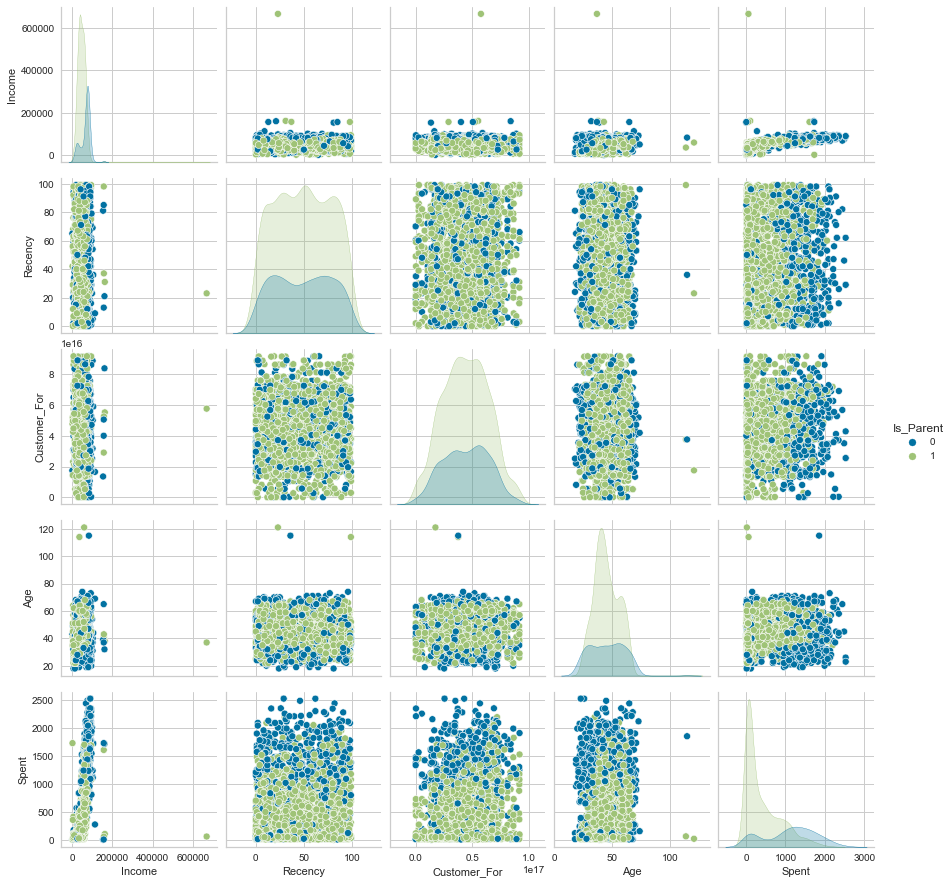

In [68]:
to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[to_plot], hue= "Is_Parent")
plt.show()

Удалим некоторые выбросы по возрасту Age и по заработку Income. Удалим покупателей старше 90 лет и зарабатывающих более 600 000$.

In [69]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print(f"Количество объектов после удаления выбросов: {data.shape[0]}")
# ----------
# Количество объектов после удаления выбросов: 2210

Количество объектов после удаления выбросов: 2212


Посмотрим на корреляцию между численными признаками.

<AxesSubplot:>

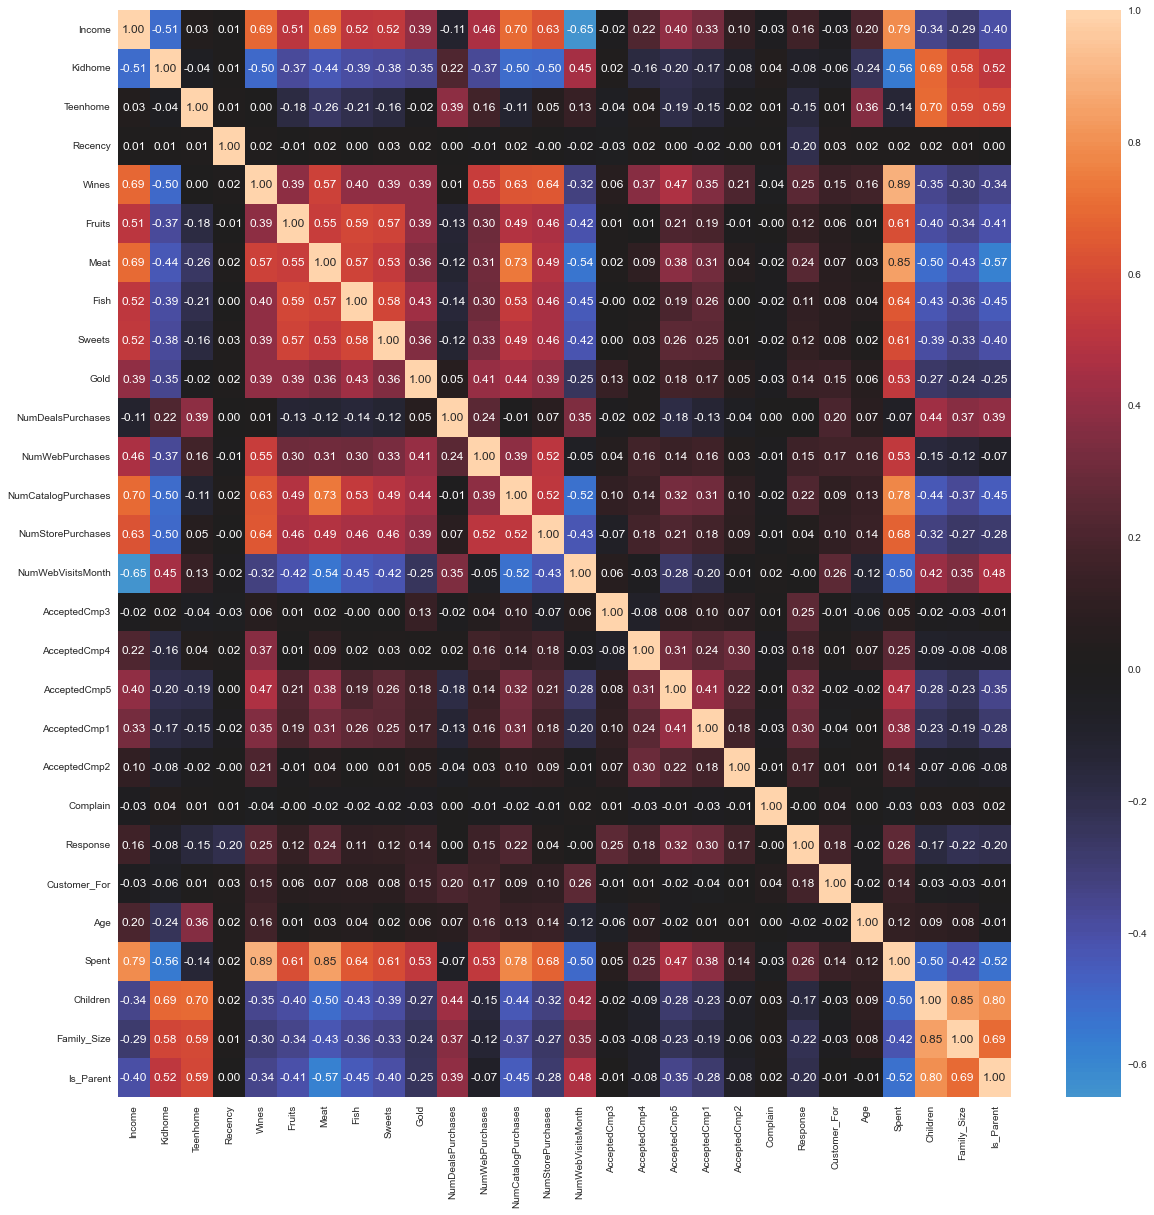

In [70]:
plt.figure(figsize=(20,20))  
sns.heatmap(data.corr(),fmt='.2f',annot=True, center=0)

В целом явных сильно коррелированных признаков нет, кроме признаков Wines и Spent c корреляцией 0.89. Мы их будем иметь ввиду, удалять пока не будем. Продолжим работу с данными.

Закодируем категориальные признаки. Так как у нас их мало (Education и Living_With), можем смело использовать LabelEncoder().

In [71]:
LE = LabelEncoder()
data['Education'] = LE.fit_transform(data['Education'])
data['Living_With'] = LE.fit_transform(data['Living_With'])


#сделаем копию данных
ds = data.copy()
# удалим бинарные признаки
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )


#Посмотрим на датасет, который будем использовать для дальнейшей кластеризации
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


Будем использовать PCA. Снизим размерность до 3, чтобы можно было визуализировать результаты кластеризации. Как и в случае с StandardScaler(), мы можем вызвать методы fit(), transform() и их суперпозицию fit_tranform().

In [72]:
pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.781993e-17,2.878377,-5.969376,-2.538496,-0.780419,2.383285,7.444312
col2,2212.0,-6.424437e-18,1.706839,-4.312231,-1.328292,-0.158089,1.242301,6.142717
col3,2212.0,6.263826e-17,1.221953,-3.530068,-0.829840,-0.025062,0.799715,6.600783


Разобьём столбцы по осям для визуализации:

In [73]:
x,y,z = PCA_ds["col1"],PCA_ds["col2"],PCA_ds["col3"]

Теперь мы можем визуализировать полученные ранее данные, чтобы понять, сколько кластеров в данных.

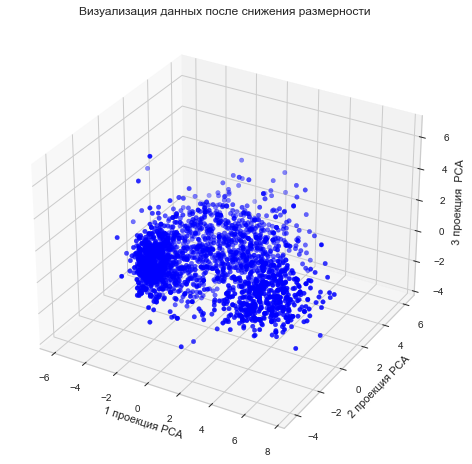

In [74]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("Визуализация данных после снижения размерности")
ax.set_xlabel('1 проекция PCA')
ax.set_ylabel('2 проекция PCA')
ax.set_zlabel('3 проекция  PCA')
plt.show()

В целом после PCA данные достаточно кучны, однако явно видны некоторые центры скопления, приблизительно 2-4.

In [75]:
pal = ["y","g", "b","r"]
#код для создания своей color map,для использование напрямую как значение параметра cmap которую далее будем использовать. 
cmap = colors.ListedColormap(["y","g", "b","r"])

Как мы знаем, методу k-means на вход необходимо подать количество кластеров. Но дело в том, что нередко, например как в данной задаче, истинное количество кластеров попросту неизвестно. 

В этом нам поможет Elbow Method https://www.scikit-yb.org/en/latest/api/cluster/elbow.html. В качестве метрики для данного метода будем использовать Distortion score. Distortion score — это квадрат расстояния от точки до её центра кластера. Оптимальным на графике ниже количество кластеров считается, если после него distortion score падает практически линейно.

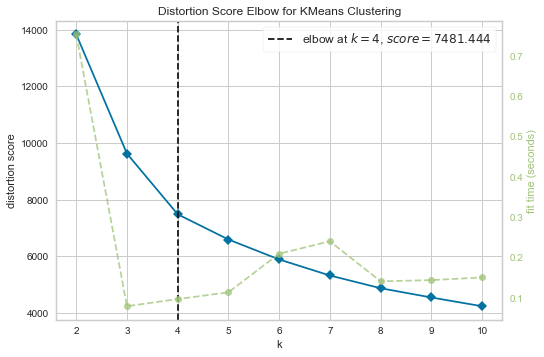

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Как видно из графика, 4 — оптимальное количество кластеров для нашей задачи. Этот метод автоматически находит необходимую нам точку, выделяя на графике чёрной пунктирной линией. Обучим модель на четырёх кластерах.

In [77]:
model = KMeans(n_clusters=4)
y_pred = model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = y_pred
data["Clusters"]= y_pred

Посмотрим на визуализацию кластеров:

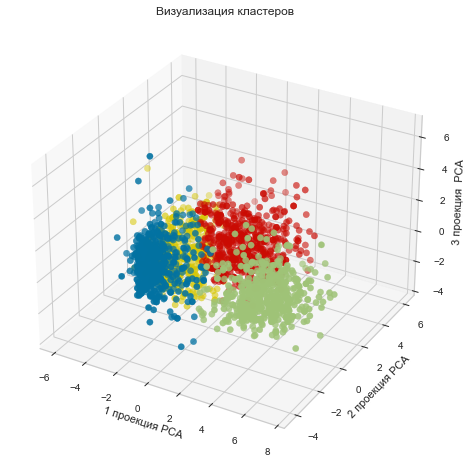

In [78]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"],cmap=cmap, marker='o')
ax.set_title("Визуализация кластеров")
ax.set_xlabel('1 проекция PCA')
ax.set_ylabel('2 проекция PCA')
ax.set_zlabel('3 проекция  PCA')
plt.show()

### АНАЛИЗ РЕЗУЛЬТАТОВ

Самая важная часть после кластеризации — интерпретировать схожесть объектов в каждом из кластеров, оценить распределения.

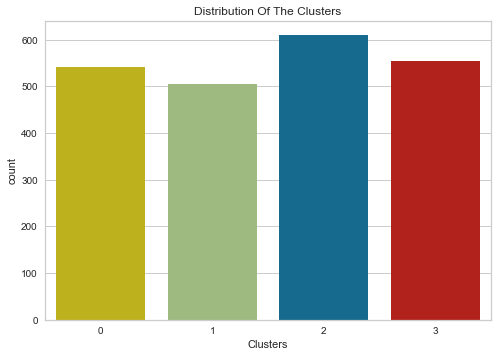

In [79]:
pl = sns.countplot(x=data["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Разбиения кластеров приблизительно равны, это хорошо, посмотрим на траты и заработок:

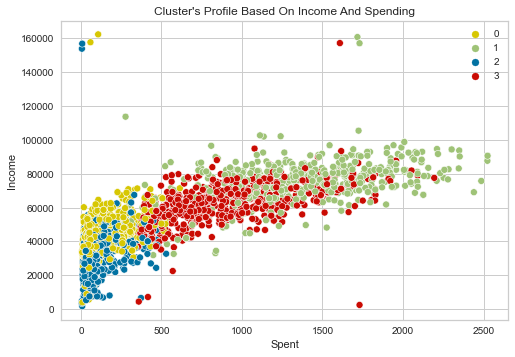

In [80]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"],palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Доходы и расходы по группам:

Группа 0: много тратят и средний доход;  
Группа 1: очень мало тратят и низкий доход;  
Группа 2: очень много тратят и высокий доход;  
Группа 3: мало тратят & средний доход.  

Для подтверждения посмотрим на ящики с усами от трат:

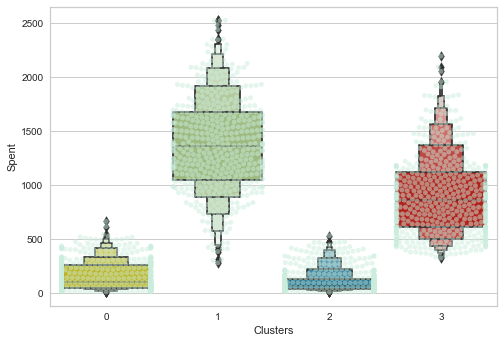

In [81]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

Таким образом, мы можем выделить, что больше всех тратит группа, в которой больше всего заработок.

### САМОСТОЯТЕЛЬНАЯ РАБОТА

В качестве необязательного самостоятельного задания предлагаем уточнить портрет из каждого кластера, посмотрев на распределения по:

количеству детей;  
размеру семьи;  
возрасту.  

Вам предстоит самостоятельно решить реальную задачу кластеризации и понижения размерности на данных о кредитных картах. Вводные данные для задачи, предобработка и код, в котором необходимо выполнять задания, вы можете найти в ноутбуке.

**Описание данных:**

CUSTID: Идентификационный номер держателя карты  

BALANCE: Доступный для трат баланс  

BALANCEFREQUENCY: Признак, показывающий как часто обновляется баланс, изменяется от 0 (никогда не обновляется) до 1 (очень часто обновляется)  

PURCHASES: Количество покупок сделанное с карты  

ONEOFFPURCHASES: Максимально поличество покупок «за раз»  

INSTALLMENTSPURCHASES: Сумма покупок в рассрочку  

CASHADVANCE: Сумма овердрафта  

PURCHASESFREQUENCY: Признак, показывающий как часто делаются покупки с карты, изменяется от 0 (никогда не используется) до 1 (постоянно используется)  

ONEOFFPURCHASESFREQUENCY: Признак, показывающий как часто Покупки происходят за один раз, изменяется от 0 (редко покупаются) до 1 (часто покупаются)  

PURCHASESINSTALLMENTSFREQUENCY: Признак, показывающий как часто Покупки происходят в рассрочку, изменяется от 0 (редко покупаются) до 1 (часто покупаются)  

CASHADVANCEFREQUENCY: Как часто платится овердрафтом  

CASHADVANCETRX: Количество оплат в овердрафте  

PURCHASESTRX: Количество транзакций покупок  

CREDITLIMIT: Лимит кредита по карте  
 
PAYMENTS: Задолженность по карте  

MINIMUM_PAYMENTS: Минимальный платеж по задолженности  

PRCFULLPAYMENT: Платеж для беспроцентного периода  

TENURE: Стоимость обслуживания карты

В ноутбуке вы увидите пропущенные строки, которые вам надо восстановить и ответить на вопросы по заданию. В работе присутствует четыре задания в коде (8.1-8.4) и одно задание на платформе с выбором ответа (8.5).  

**Задание 8.1**

Сколько пропусков в признаке MINIMUM_PAYMENTS?

In [82]:
#Загрузим и посмотрим на исходные данные 
data = pd.read_csv("data/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [83]:
#Расссмотрим столбцы поподробнее
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [84]:
print(data['MINIMUM_PAYMENTS'].isnull().sum())

313


**Задание 8.2**

Используя KElbowVisualizer из модуля yellowbrick.cluster, определите оптимальное количество кластеров. Для этого на вход KElbowVisualizer подайте модель Kmeans, максимальное количество кластеров следует ограничить до k=20. Ответом на задание является количество кластеров.

In [85]:
# Заполним значения `MINIMUM_PAYMENTS`, `CREDIT_LIMIT` средним значением:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean() # ваш код здесь  
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']= data['CREDIT_LIMIT'].mean() #ваш код 

In [86]:
# Убедимся в отсутствии пропусков:
display(data.isnull().mean() * 100)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [87]:
# Для работы с выбросами сделаем диапазоновые значения признаков, для этого будем использовать функцию
def add_range(df, columns, range_list, onesided = True):
    for column in columns:
        name = column + '_range'
        df[name] = 0
        for i in range(len(range_list)-1):
            df.loc[(df[column] > range_list[i])&(df[column] <= range_list[i+1]), name] = i+1
            if onesided:
                df.loc[(df[column] >range_list[-1]), name] = len(range_list)
    df.drop(columns, axis = 1, inplace = True)

In [88]:
add_range(data,['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS'], [0,500,1000,3000,5000,10000])

In [89]:
add_range(data,['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'] , np.linspace(0,1,11),onesided=False)

In [90]:
add_range(data,['PURCHASES_TRX', 'CASH_ADVANCE_TRX'] ,[0,5,10,15,20,30,50,100] ,onesided=False)

In [91]:
data.drop(['CUST_ID'], axis=1, inplace=True)
X= np.asarray(data)

In [92]:
# Стандартизация данных
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [93]:
# Определимся с количеством кластеров
from yellowbrick.cluster import KElbowVisualizer

In [95]:
pca = PCA(n_components=3)
PCA_ds = pd.DataFrame(pca.fit_transform(X), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8950.0,1.905366e-17,2.319447,-5.039370,-2.162175,-0.018867,1.653479,7.358654
col2,8950.0,1.270244e-17,1.941179,-3.892547,-1.443774,-0.290130,1.136907,9.470209
col3,8950.0,5.080976e-17,1.242453,-3.518466,-0.806097,0.023850,0.771565,4.382575


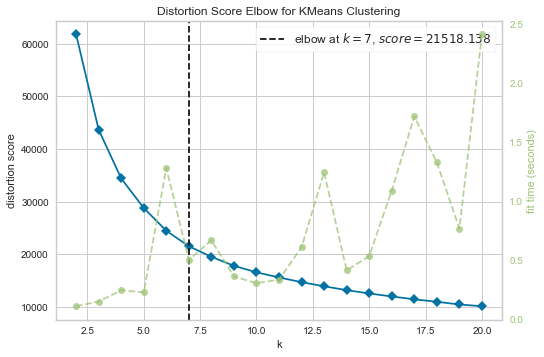

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

**Задание 8.3**

С помощью атрибута explained_variance_ratio_ выведите процент объясненной дисперсии по обеим осям. В качестве ответа внесите максимальное значение, округлённое до десятых.

In [117]:
k_clust = 7

In [118]:
# Обучите модель `Kmeans`с количеством кластеров, полученном в задании 6.2, с помощью метода
kmean= KMeans(k_clust)
kmean.fit(X) 
labels=kmean.labels_

In [120]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_range,PURCHASES_range,ONEOFF_PURCHASES_range,INSTALLMENTS_PURCHASES_range,CASH_ADVANCE_range,CREDIT_LIMIT_range,PAYMENTS_range,MINIMUM_PAYMENTS_range,BALANCE_FREQUENCY_range,PURCHASES_FREQUENCY_range,ONEOFF_PURCHASES_FREQUENCY_range,PURCHASES_INSTALLMENTS_FREQUENCY_range,CASH_ADVANCE_FREQUENCY_range,PRC_FULL_PAYMENT_range,PURCHASES_TRX_range,CASH_ADVANCE_TRX_range,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,3
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,5
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,4
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,3
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,3


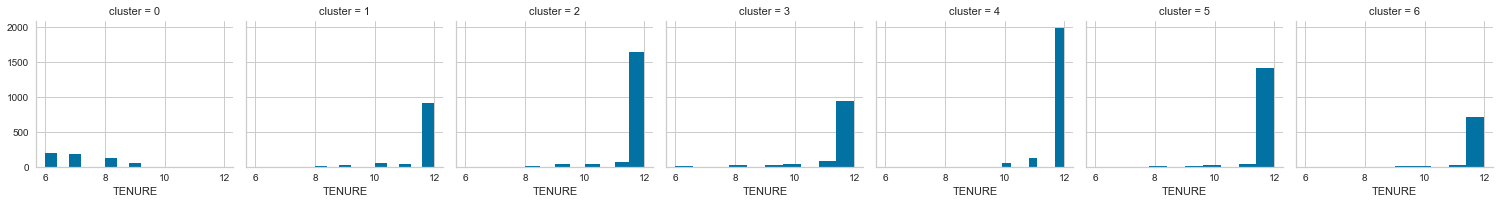

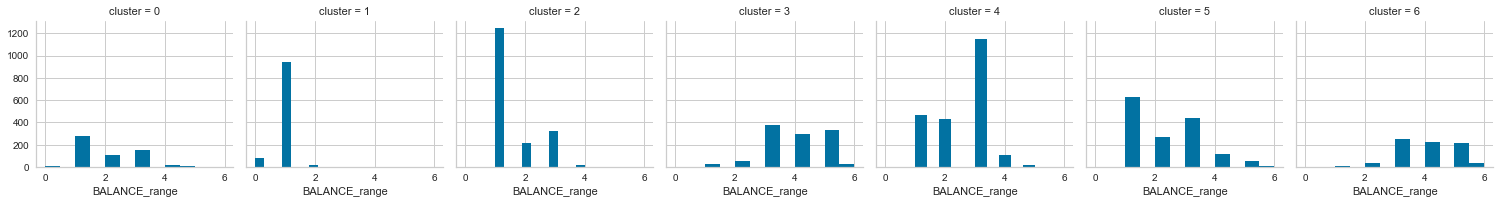

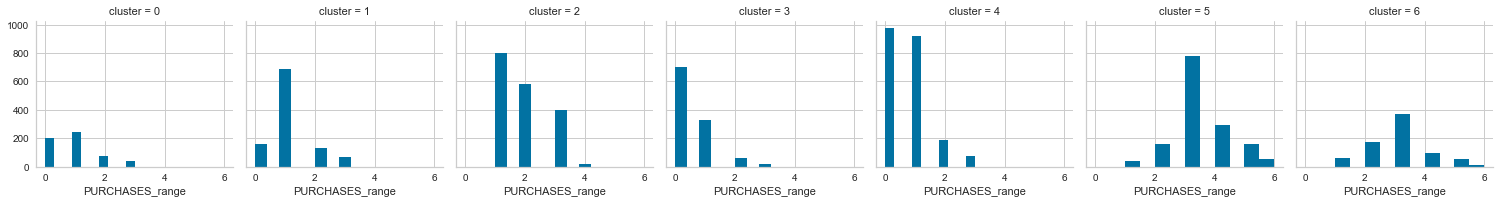

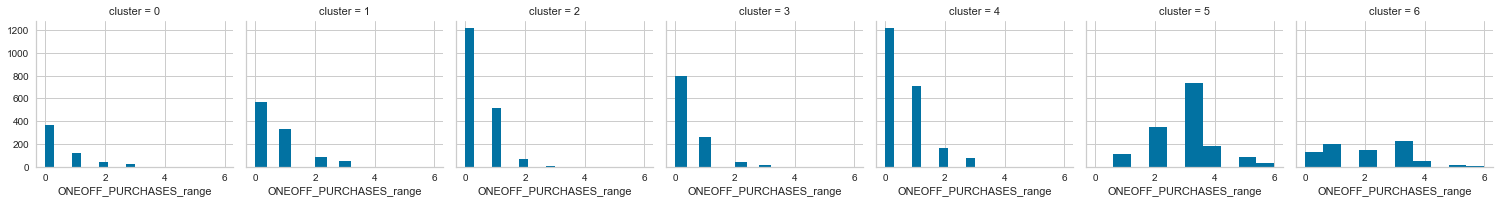

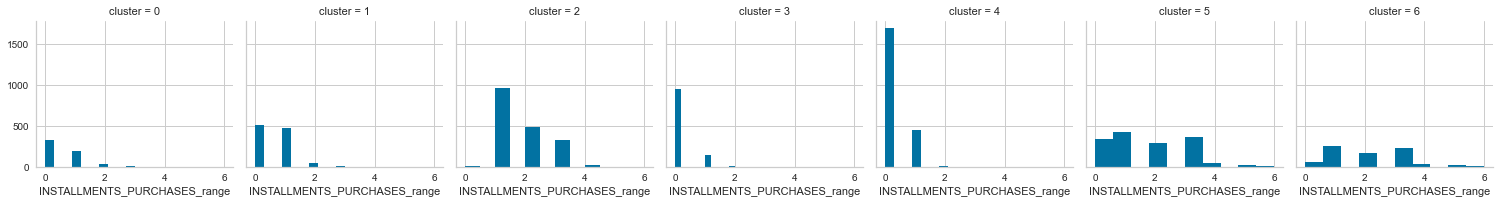

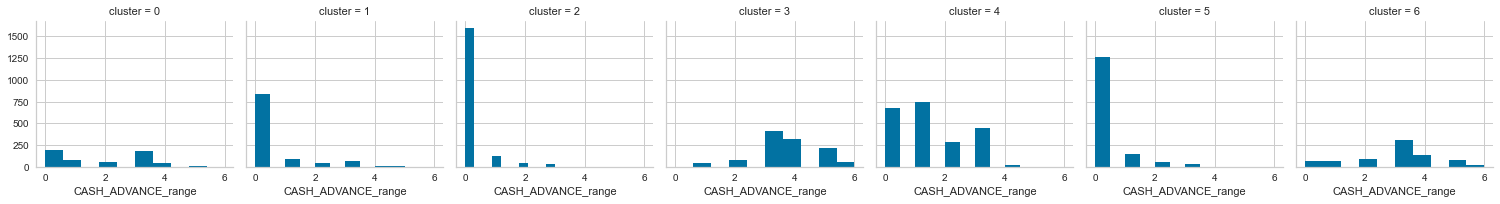

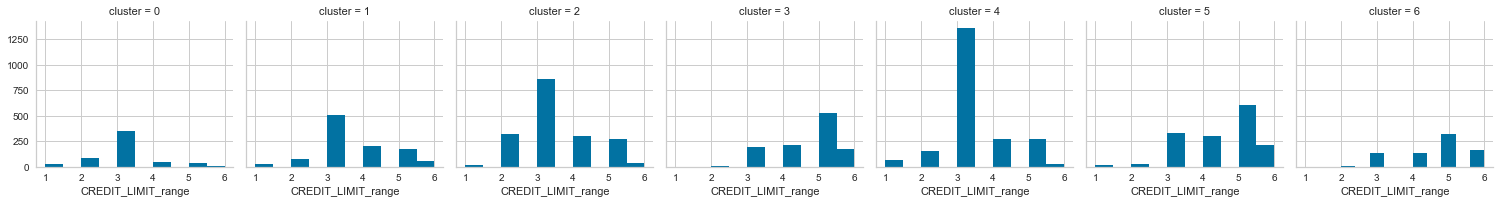

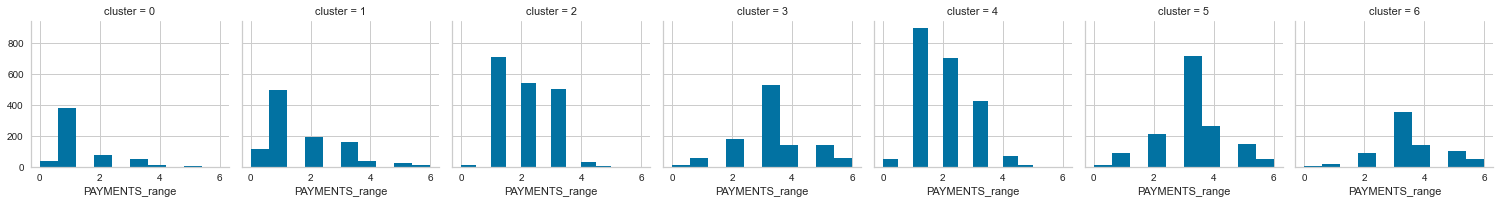

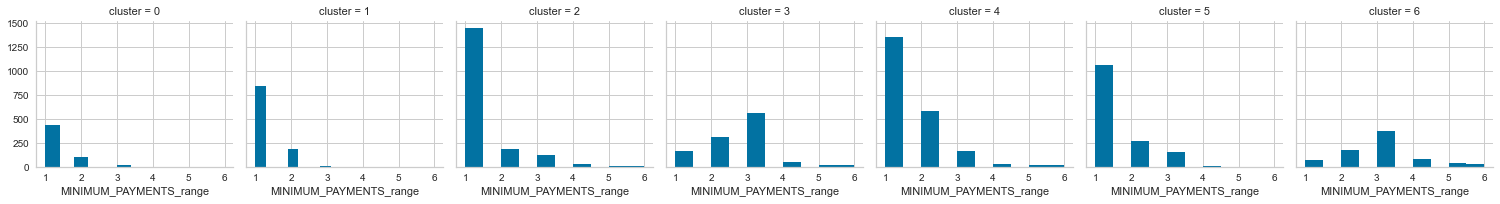

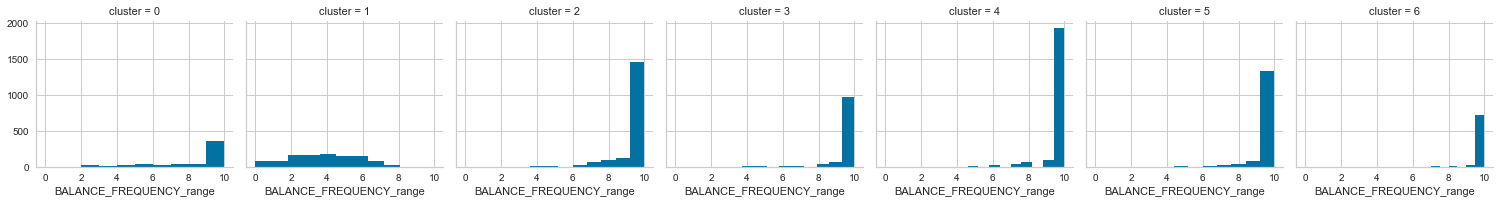

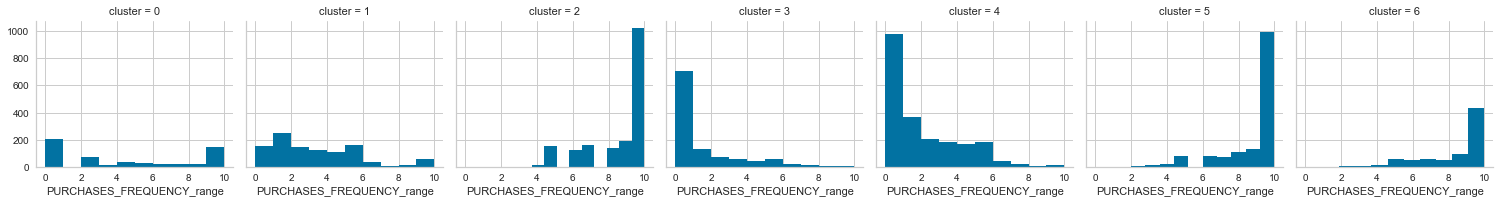

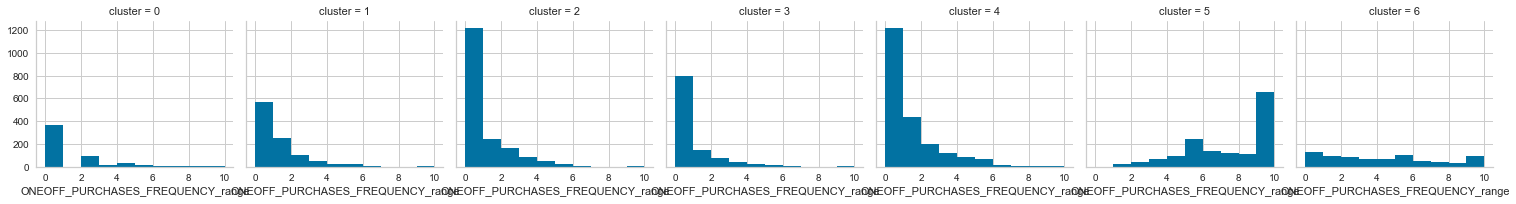

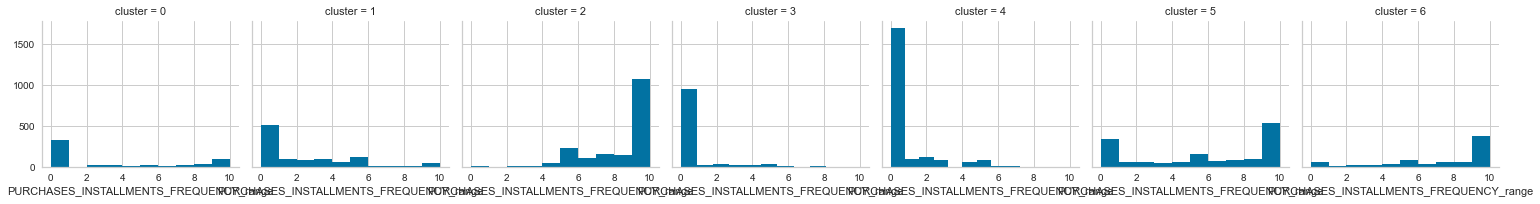

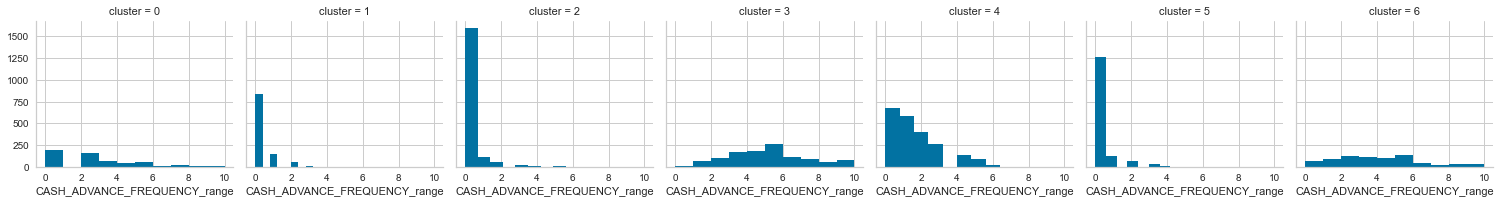

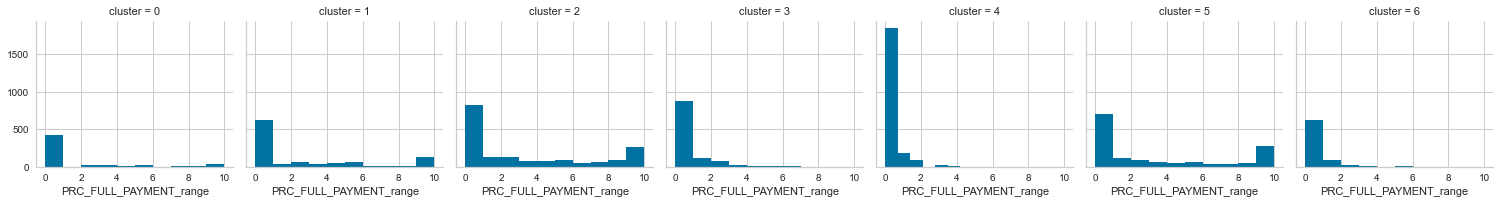

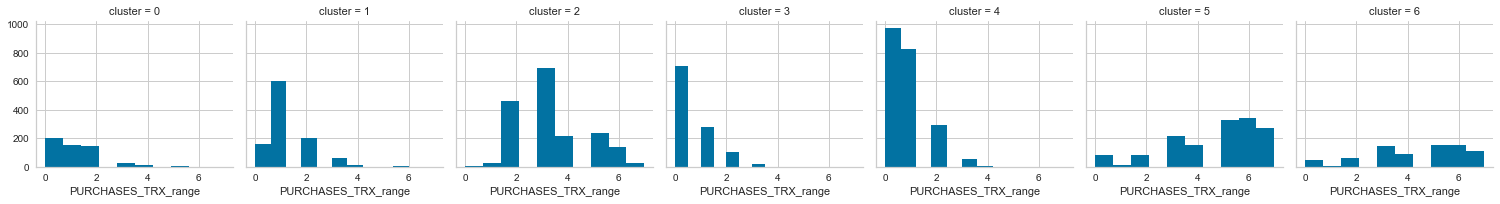

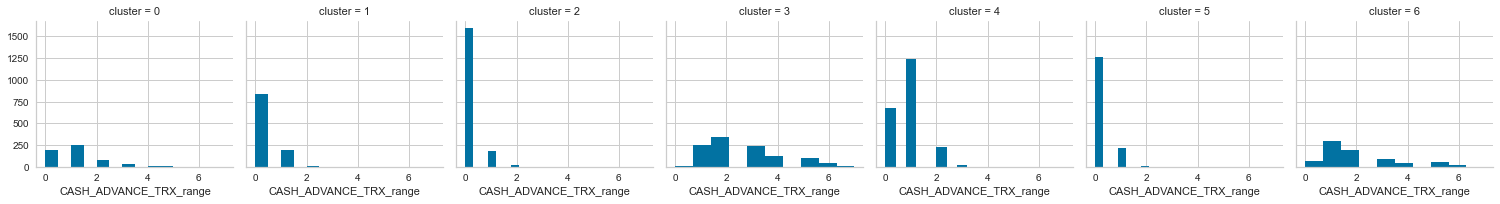

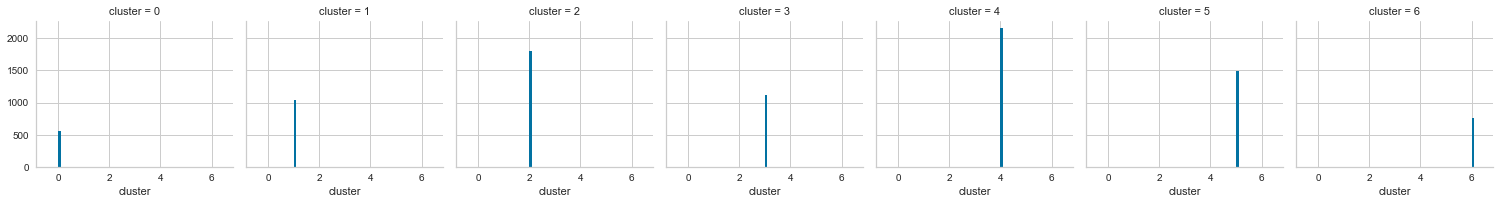

In [100]:
# Анализ результатов кластеризации
# для получения информации о распределениях признаков для каждого кластера
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [121]:
pca = PCA(2)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA.shape

(8950, 2)

In [122]:
print(pca.explained_variance_ratio_)

[0.31642559 0.22163255]


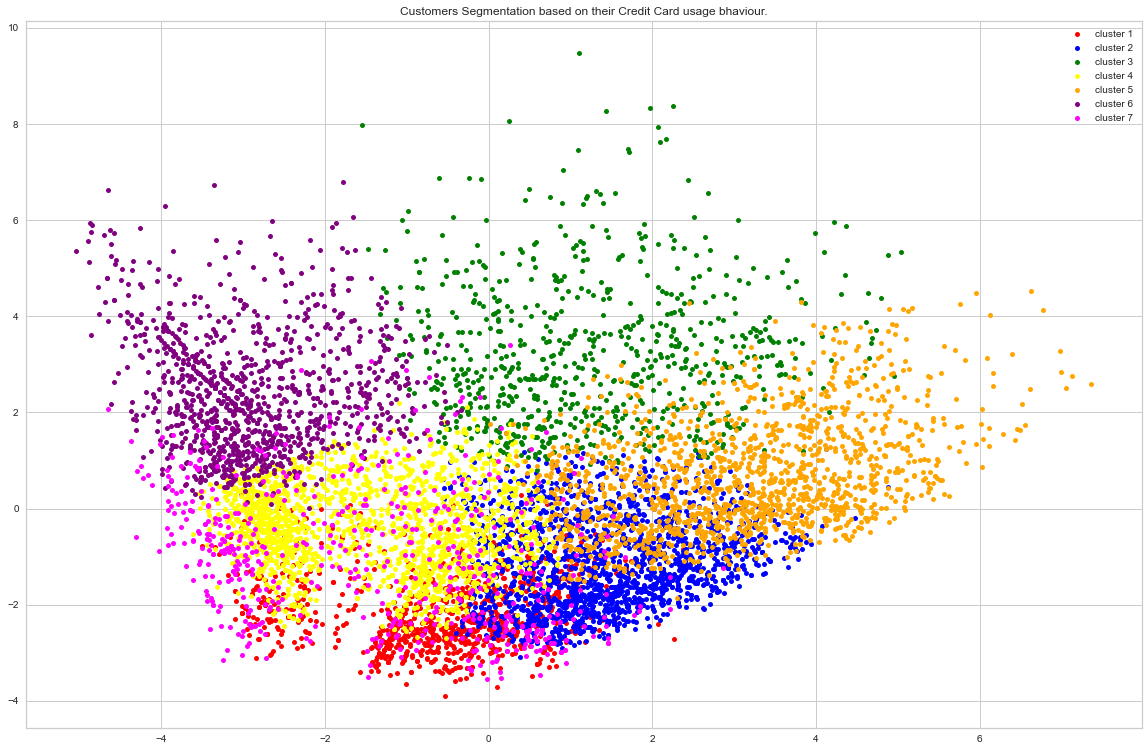

In [123]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6:'fuchsia',
          7:'pink'}

names = {i: f'cluster {i+1}' for i in range(k_clust)}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

**Задание 8.4**

С помощью атрибута explained_variance_ratio_ выведите процент объясненной дисперсии по обеим осям после применения косинусоидального значения. В качестве ответа внесите максимальное значение, округлённое до десятых.

In [124]:
#Загрузим библиотеки
import sklearn.metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity


In [125]:
def cos_dist(X):
     return 1 - cosine_similarity(X) # здесь реализация

In [126]:
dist =cos_dist(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

In [114]:
print(pca.explained_variance_ratio_)

[0.56896754 0.2515564 ]


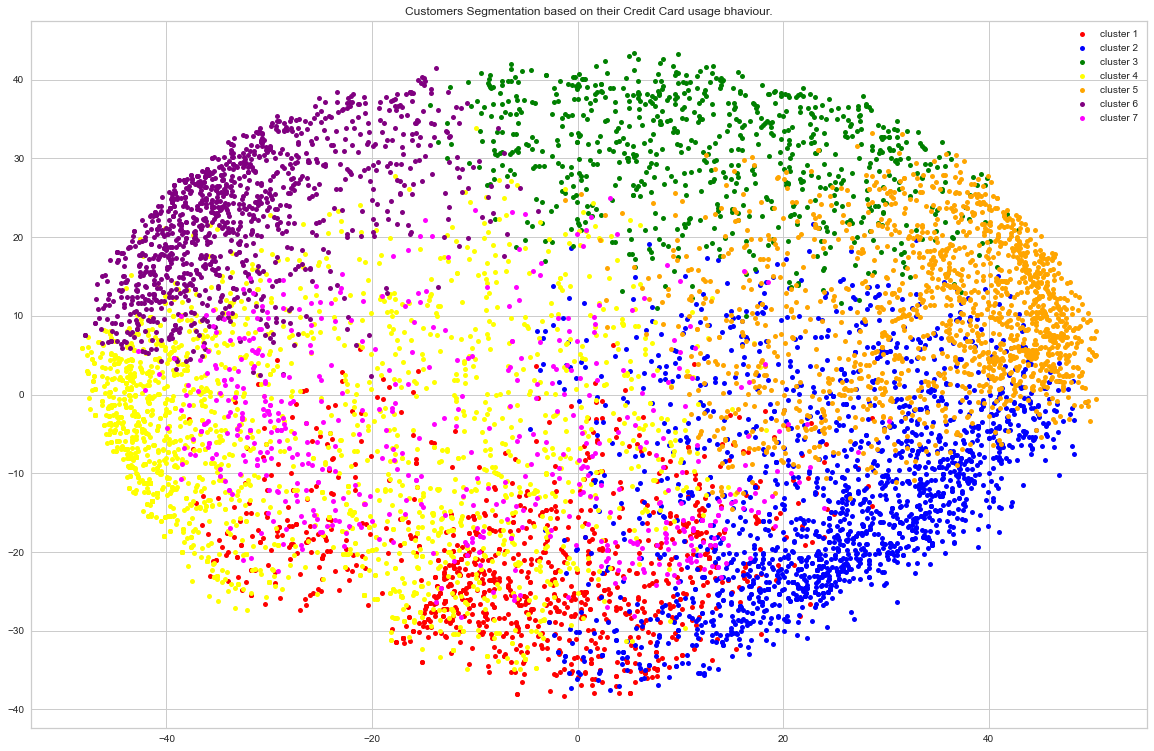

In [127]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',
          6:'fuchsia',
          7:'pink'}

names = {i: f'cluster {i+1}' for i in range(k_clust)}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

______________________________________________

### 9. Итоги

✔️ В этом модуле мы познакомились с основными методами ансамблирования, разобрались с особенностями каждого подхода. Кроме того, мы научились применять модели ансамблирования на реальных данных и разобрались в параметрах каждой из моделей. 

✔️ Также мы научились строить и применять на практике пайплайны для обработки данных и обучения модели, изменять параметры и готовить пайплайн для поиска оптимальных гиперпараметров. 

✔️  В последней части модуля мы разобрались в отличиях Metric Learning от классических задач с учителем, разобрали основные типы задач и проблемы, которые могут быть ими решены.

✔️ На реальных данных мы попробовали выполнить задачу классификации и понижения размерности.

Базовые вопросы по ансамблированию и Metric Learning встречаются практически на любом собеседовании на вакансию Junior DS. Кроме того, пайплайны существенно упрощают использование моделей, и на практике ни одна коммерческая модель не обходится без использования пайплайнов. 

_______________________________